In [847]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [848]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Working On Local Competitor File

In [849]:
local_competitor_path = '/content/drive/MyDrive/6080 dataset/2023 Local Competitor Export - Chatmeter - UPDATED.xlsx'
local_competitor = pd.read_excel(local_competitor_path)

In [850]:
local_competitor.head()

,Business Name,Client Location ID,City/State,Address,Competitor Name,Competitor Address
0,VIP Tires & Service,1,"Lewiston, ME","485 Sabattus St. Lewiston, ME 04240 US",Sullivan Tire and Auto Service,"805 Lisbon St Lewiston, ME 04240 US"
1,VIP Tires & Service,1,"Lewiston, ME","485 Sabattus St. Lewiston, ME 04240 US",Tire Warehouse,"1455 Lisbon Street Lewiston, ME 04240 US"
2,VIP Tires & Service,1,"Lewiston, ME","485 Sabattus St. Lewiston, ME 04240 US",Town Fair Tire,"755 Turner Street Auburn, ME 04210 US"
3,VIP Tires & Service,1,"Lewiston, ME","485 Sabattus St. Lewiston, ME 04240 US",Stratham Tire Inc,"150 Center St Auburn, ME 04210 US"
4,VIP Tires & Service,1,"Lewiston, ME","485 Sabattus St. Lewiston, ME 04240 US",Pep Boys Auto Parts & Service,"305 Center St Auburn, ME 04210 US"


In [851]:
pattern = r'(?P<STREET>.*?)\s(?P<CITY>.*?),\s(?P<STATE>[A-Z]{2})\s(?P<ZIP>\d{5})\sUS'

In [852]:
# apply regex pattern to address column and create new columns
local_competitor[['STREET', 'CITY', 'STATE','ZIP']] = local_competitor['Address'].str.extract(pattern)

In [853]:
local_competitor.tail()

,Business Name,Client Location ID,City/State,Address,Competitor Name,Competitor Address,STREET,CITY,STATE,ZIP
328,VIP Tires & Service,72,"Bennington, VT","251 North St, Bennington, VT 05201 US",Earl's Service Station,"251 North St, Bennington, VT 05201 US",251,"North St, Bennington",VT,05201
329,VIP Tires & Service,72,"Bennington, VT","251 North St, Bennington, VT 05201 US",Len Nichols & Sons,"538 Main St, Bennington, VT 05201 US",251,"North St, Bennington",VT,05201
330,VIP Tires & Service,72,"Bennington, VT","251 North St, Bennington, VT 05201 US",Tire Warehouse,"240 Benmont Ave, Bennington, VT 05201 US",251,"North St, Bennington",VT,05201
331,VIP Tires & Service,72,"Bennington, VT","251 North St, Bennington, VT 05201 US",Bennington Tire Corporation,"212 Benmont Ave, Bennington, VT 05201 US",251,"North St, Bennington",VT,05201
332,VIP Tires & Service,72,"Bennington, VT","251 North St, Bennington, VT 05201 US",Midas,"139-41 Northside Dr, Bennington, VT 05201 US",251,"North St, Bennington",VT,05201


In [854]:
local_competitor.dtypes

Business Name         object
Client Location ID     int64
City/State            object
Address               object
Competitor Name       object
Competitor Address    object
STREET                object
CITY                  object
STATE                 object
ZIP                   object
dtype: object

In [855]:
local_competitor.isnull().sum()

Business Name         0
Client Location ID    0
City/State            0
Address               0
Competitor Name       0
Competitor Address    0
STREET                0
CITY                  0
STATE                 0
ZIP                   0
dtype: int64

In [856]:
#removing the leading zeros from the zip column
local_competitor['ZIP'] = local_competitor['ZIP'].fillna('').apply(lambda x: x.lstrip('0'))

In [857]:
#Trying to map the Store and zip to a SET
# Create an empty dictionary
zip_to_client_ids = {}

# Iterate over the dataset and populate the dictionary
for index, row in local_competitor.iterrows():
    zip_code = row['ZIP']
    client_id = row['Client Location ID']

    if zip_code in zip_to_client_ids:
        zip_to_client_ids[zip_code].add(client_id)
    else:
        zip_to_client_ids[zip_code] = {client_id}

In [858]:
#checking values of SET
zip_to_client_ids

{'4240': {1, 35},
 '4257': {2},
 '3868': {3},
 '3104': {4},
 '4901': {5, 50},
 '3801': {6},
 '4011': {7},
 '4210': {8},
 '4412': {10},
 '4086': {11},
 '4330': {12},
 '4730': {13},
 '4073': {14},
 '4268': {15},
 '4072': {16},
 '4769': {17},
 '3878': {18},
 '4619': {19},
 '4938': {21},
 '3301': {22},
 '4915': {23},
 '3054': {24},
 '4756': {25},
 '4841': {26},
 '4401': {27, 34},
 '4062': {28},
 '4103': {29},
 '4468': {31},
 '3110': {32},
 '1843': {33},
 '3581': {36},
 '3276': {37},
 '4005': {38},
 '4106': {39},
 '4344': {40},
 '4605': {41},
 '3246': {42},
 '4096': {43},
 '3055': {44},
 '3038': {45},
 '3743': {46},
 '4976': {47},
 '3053': {48},
 '3561': {49},
 '2472': {51},
 '1862': {53},
 '4530': {54},
 '4038': {55},
 '4074': {56},
 '4046': {57},
 '3244': {58},
 '3885': {59},
 '3785': {60},
 '3784': {62},
 '5495': {63},
 '1701': {64},
 '2445': {65},
 '3431': {66},
 '5701': {67},
 '1603': {68},
 '5401': {69},
 '5482': {70},
 '3874': {71},
 '5201': {72}}

In [859]:
# Extracting Zip
#regex = r"\b\d{5}\b"
#def zip_extract(x):
#  #print(x)
#  if  re.search(regex, x):
#    return re.search(regex, x).group()
#  else:
#    return x

#local_competitor['zip'] = local_competitor['Competitor Address'].apply(zip_extract)

## Working on University Tire sales Dataset

Customer Dataset

In [860]:
customer_records_path = '/content/drive/MyDrive/6080 dataset/University Project Tires_sku.xlsx'
customer_records = pd.read_excel(customer_records_path)
# Read the Excel file into a pandas DataFrame
#df = pd.read_excel(file_path)

In [861]:
#customer_records = pd.read_excel('University Project Tires_sku.xlsx',sheet_name='Sales')
customer_records.head()

,CustomerId,Store#,Zipcode,WcYear,WcMakeText,WcModelText,WcEngineText,Date,SkuCode,Quantity,Total Price,Price per Tire,Discount,GP$,GP%
0,1111-3,14,4043,2022.0,JEEP TRUCK,WRANGLER,4-1995 2.0L DOHC,2023-01-13,2457517GOO758177707,1,196.99,196.99,0.00,49.88,25.32
1,11112-1,12,4330,2013.0,HYUNDAI,ELANTRA,4-1797 1.8L DOHC,2023-03-20,2055516MIMMRS37,2,193.98,96.99,0.00,71.42,36.82
2,1116-1,16,4101,2011.0,KIA TRUCK,SORENTO,4-2359 2.4L DOHC,2022-12-04,2456517ELDWTX67,4,457.93,162.99,194.03,17.53,3.83
3,1136-1,11,4008,2015.0,NISSAN-DATSUN,ROGUE,4-2488 2.5L DOHC,2022-04-03,2256018SUMASP34,4,452.55,163.83,202.77,64.63,14.28
4,1136-1,11,4008,2015.0,FORD TRUCK,ESCAPE,4-121 2.0L DOHC,2022-11-25,2355517GOO767181537,4,715.80,238.60,238.60,25.60,3.58


In [862]:
# Checking the unique WcmakeText in order to figuring out weather we can do deeper analysis based on the car brand.
customer_records['WcMakeText'].value_counts()

TOYOTA TRUCK       12268
TOYOTA             11982
FORD TRUCK         11022
CHEVROLET TRUCK     9771
SUBARU              7995
                   ...  
chevy                  1
STUDEBAKER             1
Pontiac                1
HYUNDI                 1
huyndai                1
Name: WcMakeText, Length: 155, dtype: int64

In [863]:
# Dropping Unnecessary columns
customer_records = customer_records.drop(["CustomerId", "Zipcode","WcModelText","WcEngineText"], axis=1)

In [864]:
customer_records.head()

,Store#,WcYear,WcMakeText,Date,SkuCode,Quantity,Total Price,Price per Tire,Discount,GP$,GP%
0,14,2022.0,JEEP TRUCK,2023-01-13,2457517GOO758177707,1,196.99,196.99,0.00,49.88,25.32
1,12,2013.0,HYUNDAI,2023-03-20,2055516MIMMRS37,2,193.98,96.99,0.00,71.42,36.82
2,16,2011.0,KIA TRUCK,2022-12-04,2456517ELDWTX67,4,457.93,162.99,194.03,17.53,3.83
3,11,2015.0,NISSAN-DATSUN,2022-04-03,2256018SUMASP34,4,452.55,163.83,202.77,64.63,14.28
4,11,2015.0,FORD TRUCK,2022-11-25,2355517GOO767181537,4,715.80,238.60,238.60,25.60,3.58


In [865]:
# Function to map store zip code
def add_store_zip(x):
  for key in zip_to_client_ids:
    # Check if the search string is in the set associated with this key
    if x in zip_to_client_ids[key]:
        #print(f"{key} contains {x}")
        return key

# Adding Store zip code
customer_records['ZIP'] = customer_records['Store#'].apply(add_store_zip)

In [866]:
#changing the column name for similarity
local_competitor.rename(columns = {"Client Location ID":"Store#"},inplace=True)

In [867]:
# Checking weather store zip is completely mapped or not.
customer_records['ZIP'].isnull().sum()

0

In [868]:
# Renaming the Sku
customer_records.rename(columns = {"SkuCode":"sku"},inplace=True)

In [869]:
customer_records.head()

,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,ZIP
0,14,2022.0,JEEP TRUCK,2023-01-13,2457517GOO758177707,1,196.99,196.99,0.00,49.88,25.32,4073
1,12,2013.0,HYUNDAI,2023-03-20,2055516MIMMRS37,2,193.98,96.99,0.00,71.42,36.82,4330
2,16,2011.0,KIA TRUCK,2022-12-04,2456517ELDWTX67,4,457.93,162.99,194.03,17.53,3.83,4072
3,11,2015.0,NISSAN-DATSUN,2022-04-03,2256018SUMASP34,4,452.55,163.83,202.77,64.63,14.28,4086
4,11,2015.0,FORD TRUCK,2022-11-25,2355517GOO767181537,4,715.80,238.60,238.60,25.60,3.58,4086


In [870]:
local_competitor.head()

,Business Name,Store#,City/State,Address,Competitor Name,Competitor Address,STREET,CITY,STATE,ZIP
0,VIP Tires & Service,1,"Lewiston, ME","485 Sabattus St. Lewiston, ME 04240 US",Sullivan Tire and Auto Service,"805 Lisbon St Lewiston, ME 04240 US",485,Sabattus St. Lewiston,ME,4240
1,VIP Tires & Service,1,"Lewiston, ME","485 Sabattus St. Lewiston, ME 04240 US",Tire Warehouse,"1455 Lisbon Street Lewiston, ME 04240 US",485,Sabattus St. Lewiston,ME,4240
2,VIP Tires & Service,1,"Lewiston, ME","485 Sabattus St. Lewiston, ME 04240 US",Town Fair Tire,"755 Turner Street Auburn, ME 04210 US",485,Sabattus St. Lewiston,ME,4240
3,VIP Tires & Service,1,"Lewiston, ME","485 Sabattus St. Lewiston, ME 04240 US",Stratham Tire Inc,"150 Center St Auburn, ME 04210 US",485,Sabattus St. Lewiston,ME,4240
4,VIP Tires & Service,1,"Lewiston, ME","485 Sabattus St. Lewiston, ME 04240 US",Pep Boys Auto Parts & Service,"305 Center St Auburn, ME 04210 US",485,Sabattus St. Lewiston,ME,4240


In [871]:
#Checking the duplicates
duplicates = customer_records['Store#'].duplicated()
duplicates

0         False
1         False
2         False
3         False
4          True
          ...  
189961     True
189962     True
189963     True
189964     True
189965     True
Name: Store#, Length: 189966, dtype: bool

In [872]:
#checking the STATE value
local_competitor['STATE'].isnull().sum()

0

In [873]:
# function to map street, city and state in customer_records dataframe
# Create an empty dictionary to store the store information
store_info_mapping = {}

# Iterate over the rows of local_competitor
for index, row in local_competitor.iterrows():
    store = row['Store#']
    street = row['STREET']
    city = row['CITY']
    state = row['STATE']

    # Check if the store already exists in the dictionary
    if store in store_info_mapping:
        # Check if the store information is already present in the row
        if (row['STREET'] != street) or (row['CITY'] != city) or (row['STATE'] != state):
            # Append the information to the existing store entry
            store_info_mapping[store]['STREET'] += f", {street}"
            store_info_mapping[store]['CITY'] += f", {city}"
            store_info_mapping[store]['STATE'] += f", {state}"
    else:
        # Create a new store entry in the dictionary
        store_info_mapping[store] = {
            'STREET': street,
            'CITY': city,
            'STATE': state
        }

# Define a function to add store information based on 'Store#' column
def add_store_info(row):
    store = row['Store#']
    if store in store_info_mapping:
        store_info = store_info_mapping[store]
        row['STREET'] = store_info['STREET']
        row['CITY'] = store_info['CITY']
        row['STATE'] = store_info['STATE']
    return row

# Apply the function to add store information to customer_records
customer_records = customer_records.apply(add_store_info, axis=1)


In [874]:
customer_records.head()

,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,ZIP,STREET,CITY,STATE
0,14,2022.0,JEEP TRUCK,2023-01-13,2457517GOO758177707,1,196.99,196.99,0.00,49.88,25.32,4073,1238,Main St. Sanford,ME
1,12,2013.0,HYUNDAI,2023-03-20,2055516MIMMRS37,2,193.98,96.99,0.00,71.42,36.82,4330,61,Western Ave. Augusta,ME
2,16,2011.0,KIA TRUCK,2022-12-04,2456517ELDWTX67,4,457.93,162.99,194.03,17.53,3.83,4072,3,Ocean Park Rd. Saco,ME
3,11,2015.0,NISSAN-DATSUN,2022-04-03,2256018SUMASP34,4,452.55,163.83,202.77,64.63,14.28,4086,2,Union Park Topsham,ME
4,11,2015.0,FORD TRUCK,2022-11-25,2355517GOO767181537,4,715.80,238.60,238.60,25.60,3.58,4086,2,Union Park Topsham,ME


Tire Data


In [875]:
tire_data_path= '/content/drive/MyDrive/6080 dataset/University Project Tires_sku.xlsx'
tire_data = pd.read_excel(tire_data_path,sheet_name='Tire Data')
tire_data.head()


,sku,name,season,section,aspect,rim,loadIndex,loadRange,speedRating
0,100015CAR51F385,Carlisle,none,10.0,-,15,NaN,D / 8,NaN
1,100015PWKAQP61,Power King,none,10.0,-,15,141,H / 16,L
2,100015SUM5530507,Sumitomo,none,10.0,-,15,NaN,G / 14,NaN
3,100016BKT94020447,BKT,none,0.0,0,0,NaN,D/8,0
4,100016CAR52F398,Carlisle,none,10.0,-,16,NaN,D / 8,NaN


In [876]:
#mapping tire and customer_records based on sku
# Create an empty dictionary
sku_dict = {}

# Iterate over the dataset and populate the dictionary
for index, row in tire_data.iterrows():
    sku_code = row['sku']
    name = row['name']
    season = row['season']
    sku_dict[sku_code] = {'name': name, 'season': season}

# Map the 'sku' column in customer_records dataframe with the sku_dict
tire_data['name'] = tire_data['sku'].map(lambda sku: sku_dict[sku]['name'] if sku in sku_dict else None)
tire_data['season'] = tire_data['sku'].map(lambda sku: sku_dict[sku]['season'] if sku in sku_dict else None)

In [877]:
#working on null columns
tire_data.isnull().sum()

sku               0
name              0
season            0
section           0
aspect            0
rim               0
loadIndex      1589
loadRange      3536
speedRating    1488
dtype: int64

In [878]:
#checking the null on tire name
null_name = tire_data[tire_data['name'].isnull()]
null_name

,sku,name,season,section,aspect,rim,loadIndex,loadRange,speedRating


In [879]:
df = customer_records

In [880]:
df.dtypes

Store#                     int64
WcYear                   float64
WcMakeText                object
Date              datetime64[ns]
sku                       object
Quantity                   int64
Total Price              float64
Price per Tire           float64
Discount                 float64
GP$                      float64
GP%                      float64
ZIP                       object
STREET                    object
CITY                      object
STATE                     object
dtype: object

In [881]:
df['WcYear'] = pd.DatetimeIndex(df['Date']).year
df['WcYear'].value_counts()

2022    74578
2021    74381
2020    23156
2023    17851
Name: WcYear, dtype: int64

In [882]:
df.dtypes

Store#                     int64
WcYear                     int64
WcMakeText                object
Date              datetime64[ns]
sku                       object
Quantity                   int64
Total Price              float64
Price per Tire           float64
Discount                 float64
GP$                      float64
GP%                      float64
ZIP                       object
STREET                    object
CITY                      object
STATE                     object
dtype: object

In [883]:
df.head()

,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,ZIP,STREET,CITY,STATE
0,14,2023,JEEP TRUCK,2023-01-13,2457517GOO758177707,1,196.99,196.99,0.00,49.88,25.32,4073,1238,Main St. Sanford,ME
1,12,2023,HYUNDAI,2023-03-20,2055516MIMMRS37,2,193.98,96.99,0.00,71.42,36.82,4330,61,Western Ave. Augusta,ME
2,16,2022,KIA TRUCK,2022-12-04,2456517ELDWTX67,4,457.93,162.99,194.03,17.53,3.83,4072,3,Ocean Park Rd. Saco,ME
3,11,2022,NISSAN-DATSUN,2022-04-03,2256018SUMASP34,4,452.55,163.83,202.77,64.63,14.28,4086,2,Union Park Topsham,ME
4,11,2022,FORD TRUCK,2022-11-25,2355517GOO767181537,4,715.80,238.60,238.60,25.60,3.58,4086,2,Union Park Topsham,ME


In [884]:
# Saving above df
#file_path = '/content/drive/MyDrive/6080 dataset/unclean_combined_dataset.csv'
#df.to_csv(file_path, index=False)

In [885]:
# We will ignore where quantity is zero and less as there is only 39 records
df[df['Quantity'] <= 0].shape

(1222, 15)

## Cleaning the Combined dataset

In [886]:
unclean_combined_path = '/content/drive/MyDrive/6080 dataset/unclean_combined_dataset.csv'
unclean_combined = pd.read_csv(unclean_combined_path, low_memory=False)
unclean_combined.head()

,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,ZIP,STREET,CITY,STATE,name,season
0,14,2023,JEEP TRUCK,2023-01-13,2457517GOO758177707,1,196.99,196.99,0.00,49.88,25.32,4073,1238,Main St. Sanford,ME,Goodyear,all-season
1,12,2023,HYUNDAI,2023-03-20,2055516MIMMRS37,2,193.98,96.99,0.00,71.42,36.82,4330,61,Western Ave. Augusta,ME,Multi-Mile,all-season
2,16,2022,KIA TRUCK,2022-12-04,2456517ELDWTX67,4,457.93,162.99,194.03,17.53,3.83,4072,3,Ocean Park Rd. Saco,ME,Eldorado,all-season
3,11,2022,NISSAN-DATSUN,2022-04-03,2256018SUMASP34,4,452.55,163.83,202.77,64.63,14.28,4086,2,Union Park Topsham,ME,Sumitomo,all-season
4,11,2022,FORD TRUCK,2022-11-25,2355517GOO767181537,4,715.80,238.60,238.60,25.60,3.58,4086,2,Union Park Topsham,ME,Goodyear,all-weather


In [887]:
# Looking at null Values
unclean_combined.isnull().sum()

Store#                0
WcYear                0
WcMakeText        38247
Date                  0
sku                   0
Quantity              0
Total Price           0
Price per Tire        0
Discount              0
GP$                   6
GP%                 817
ZIP                   0
STREET                0
CITY                  0
STATE                 0
name               1857
season             1857
dtype: int64

In [888]:
#replacinng all the missing WcMakeText values with "unknown"
unclean_combined['WcMakeText'].fillna('Unknown',inplace=True)

In [889]:
#dropping all the price per tire which are less than or equal to 0 as it is not very significant
unclean_combined = unclean_combined[unclean_combined['Price per Tire'] > 0]
unclean_combined.reset_index(drop=True)

,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,ZIP,STREET,CITY,STATE,name,season
0,14,2023,JEEP TRUCK,2023-01-13,2457517GOO758177707,1,196.99,196.99,0.00,49.88,25.32,4073,1238,Main St. Sanford,ME,Goodyear,all-season
1,12,2023,HYUNDAI,2023-03-20,2055516MIMMRS37,2,193.98,96.99,0.00,71.42,36.82,4330,61,Western Ave. Augusta,ME,Multi-Mile,all-season
2,16,2022,KIA TRUCK,2022-12-04,2456517ELDWTX67,4,457.93,162.99,194.03,17.53,3.83,4072,3,Ocean Park Rd. Saco,ME,Eldorado,all-season
3,11,2022,NISSAN-DATSUN,2022-04-03,2256018SUMASP34,4,452.55,163.83,202.77,64.63,14.28,4086,2,Union Park Topsham,ME,Sumitomo,all-season
4,11,2022,FORD TRUCK,2022-11-25,2355517GOO767181537,4,715.80,238.60,238.60,25.60,3.58,4086,2,Union Park Topsham,ME,Goodyear,all-weather
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189572,23,2020,Unknown,2020-10-05,2358516MIMXTS17,2,303.98,151.99,0.00,123.26,40.55,4915,35,Starrett Dr. Belfast,ME,Multi-Mile,all-season
189573,23,2021,Unknown,2021-04-17,2057515PWKMAXV48,2,101.48,56.38,11.28,26.80,26.41,4915,35,Starrett Dr. Belfast,ME,Power King,none
189574,2,2022,Unknown,2022-11-13,2055017MIMMRS12,2,222.18,111.09,0.00,85.48,38.47,4257,257,River Rd. Mexico,ME,Multi-Mile,all-season
189575,26,2021,Unknown,2021-10-05,2057515PWKMAXV48,2,179.98,89.99,0.00,72.50,40.28,4841,137,Camden St. Rockland,ME,Power King,none


In [890]:
# Dropping Quantity which is less than or equal to zero
unclean_combined = unclean_combined[unclean_combined['Quantity'] > 0]
unclean_combined = unclean_combined.reset_index(drop=True)

In [891]:
# Looking at null Values
unclean_combined.isnull().sum()

Store#               0
WcYear               0
WcMakeText           0
Date                 0
sku                  0
Quantity             0
Total Price          0
Price per Tire       0
Discount             0
GP$                  0
GP%                390
ZIP                  0
STREET               0
CITY                 0
STATE                0
name              1539
season            1539
dtype: int64

In [892]:
null_gp_values = unclean_combined[unclean_combined['GP%'].isnull()]
null_gp_values

,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,ZIP,STREET,CITY,STATE,name,season
224,1,2021,CHRYSLER,2021-06-12,2155517SLRSLR08,1,0.0,66.96,66.96,-42.36,NaN,4240,485,Sabattus St. Lewiston,ME,Solar,all-season
382,41,2021,FORD TRUCK,2021-08-04,2257516MIM4SX24,2,0.0,137.69,275.38,-182.68,NaN,4605,24,Downeast Highway Ellsworth,ME,Multi-Mile,all-season
857,68,2021,HONDA,2021-08-09,2155516GOO407525374,1,0.0,135.41,135.41,-99.74,NaN,1603,3,Coes Square Worcester,MA,Goodyear,all-season
2344,56,2022,CHEVROLET TRUCK,2022-05-08,2656518MIC56465,2,0.0,262.26,524.52,-424.48,NaN,4074,441,Payne Rd. Scarborough,ME,Michelin,all-season
2981,7,2022,VOLKSWAGEN,2022-10-05,2254018SUMASP78,1,0.0,155.99,155.99,-105.92,NaN,4011,51,Bath Rd. Brunswick,ME,Sumitomo,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186544,42,2021,Unknown,2021-06-30,2055516GOO407781374,1,0.0,114.61,114.61,-80.71,NaN,3246,1033,Union Ave. Laconia,NH,Goodyear,all-season
186780,49,2021,Unknown,2021-03-02,1856014MIM5514024,4,0.0,43.58,174.32,-108.08,NaN,3561,862,Meadow St. Littleton,NH,Multi-Mile,all-season
187230,27,2020,Unknown,2020-12-07,2056016SLRSLR18,1,0.0,58.99,58.99,-37.55,NaN,4401,267,Odlin Rd. Bangor,ME,Solar,all-season
187571,46,2021,Unknown,2021-07-16,2456018SUMASP68,1,0.0,133.61,133.61,-87.93,NaN,3743,366,Washington Street Claremont,NH,Sumitomo,none


In [893]:
#dropping the GP% values which are null since it cannot be calculated as GP$ is either negative or the formula value dosent match
unclean_combined = unclean_combined.dropna(subset=['GP%'])
unclean_combined = unclean_combined.reset_index(drop=True)

In [894]:
null_tire_values = unclean_combined[unclean_combined['name'].isnull()]
null_tire_values

,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,ZIP,STREET,CITY,STATE,name,season
31,65,2021,HYUNDAI TRUCK,2021-10-04,OPTIRE,1,159.78,159.78,0.0,25.73,16.10,2445,128,Boylston St Brookline,MA,NaN,NaN
66,55,2022,VOLVO,2022-11-25,OPTIRE,4,1087.96,271.99,0.0,211.96,19.48,4038,14,County Road Gorham,ME,NaN,NaN
149,62,2021,VOLKSWAGEN,2021-07-27,OPTIRE,4,559.96,139.99,0.0,66.56,11.89,3784,38,Railroad Avenue West Lebanon,NH,NaN,NaN
208,29,2021,MITSUBISHI,2021-11-18,OPTIRE,2,285.20,142.60,0.0,85.56,30.00,4103,35,Riverside St. Portland,ME,NaN,NaN
273,45,2020,Unknown,2020-11-11,2055516MICH52991,4,650.72,162.68,0.0,160.92,24.73,3038,26-28,Manchester Rd. Derry,NH,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187241,66,2021,Unknown,2021-05-27,OPTIRE,4,1300.00,325.00,0.0,157.24,12.10,3431,526,Main St. Keene,NH,NaN,NaN
187746,49,2021,Unknown,2021-01-29,OPTIRE,2,570.00,285.00,0.0,40.00,7.02,3561,862,Meadow St. Littleton,NH,NaN,NaN
187747,49,2021,Unknown,2021-01-29,OPTIRE,8,2600.00,325.00,0.0,160.00,6.15,3561,862,Meadow St. Littleton,NH,NaN,NaN
187749,49,2021,Unknown,2021-06-01,OPTIRE,2,650.00,325.00,0.0,62.00,9.54,3561,862,Meadow St. Littleton,NH,NaN,NaN


In [895]:
#replacinng all the missing tire name and season values with "unknown"
unclean_combined['name'].fillna('Unknown',inplace=True)
unclean_combined['season'].fillna('Unknown',inplace=True)

In [896]:
# Looking at null Values
unclean_combined.isnull().sum().sum()

0

In [897]:
# Saving above df
#file_path = '/content/drive/MyDrive/6080 dataset/clean_combined_dataset.csv'
#df.to_csv(file_path, index=False)


# READING CPI DATA

In [898]:

cpi_data_path = '/content/drive/MyDrive/6080 dataset/cpi_data.xls'
cpi_data = pd.read_excel(cpi_data_path)

In [899]:
cpi_data.drop(cpi_data.index[:10], inplace=True)

In [900]:
cpi_data.head()

,FRED Graph Observations,Unnamed: 1
10,1947-01-01 00:00:00,28.5
11,1947-02-01 00:00:00,28.4
12,1947-03-01 00:00:00,28.4
13,1947-04-01 00:00:00,28.4
14,1947-05-01 00:00:00,28.4


In [901]:
cpi_data.reset_index(drop=True, inplace=True)

In [902]:
cpi_data.columns = ['Date','CPI']

In [903]:
cpi_data.head()

,Date,CPI
0,1947-01-01 00:00:00,28.5
1,1947-02-01 00:00:00,28.4
2,1947-03-01 00:00:00,28.4
3,1947-04-01 00:00:00,28.4
4,1947-05-01 00:00:00,28.4


In [904]:
# Convert the 'Date' column in cpi_data to datetime
cpi_data['Date'] = pd.to_datetime(cpi_data['Date'])

# Set the 'Date' column as the index in cpi_data
cpi_data.set_index('Date', inplace=True)

# Resample to daily frequency and forward-fill the missing values
cpi_data_daily = cpi_data.resample('D').ffill()

# Reset the index to turn the 'Date' column back into a regular column in cpi_data_daily
cpi_data_daily.reset_index(inplace=True)

# Filter the DataFrame to include rows within the desired date range
start_date = '2020-10-01'
end_date = '2023-04-21'
cpi_data_filtered = cpi_data_daily.loc[(cpi_data_daily['Date'] >= start_date) & (cpi_data_daily['Date'] <= end_date)]

# Print the column names of the cpi_data_filtered DataFrame
print(cpi_data_filtered.columns)



Index(['Date', 'CPI'], dtype='object')


In [905]:
unclean_combined.head()

,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,ZIP,STREET,CITY,STATE,name,season
0,14,2023,JEEP TRUCK,2023-01-13,2457517GOO758177707,1,196.99,196.99,0.00,49.88,25.32,4073,1238,Main St. Sanford,ME,Goodyear,all-season
1,12,2023,HYUNDAI,2023-03-20,2055516MIMMRS37,2,193.98,96.99,0.00,71.42,36.82,4330,61,Western Ave. Augusta,ME,Multi-Mile,all-season
2,16,2022,KIA TRUCK,2022-12-04,2456517ELDWTX67,4,457.93,162.99,194.03,17.53,3.83,4072,3,Ocean Park Rd. Saco,ME,Eldorado,all-season
3,11,2022,NISSAN-DATSUN,2022-04-03,2256018SUMASP34,4,452.55,163.83,202.77,64.63,14.28,4086,2,Union Park Topsham,ME,Sumitomo,all-season
4,11,2022,FORD TRUCK,2022-11-25,2355517GOO767181537,4,715.80,238.60,238.60,25.60,3.58,4086,2,Union Park Topsham,ME,Goodyear,all-weather


In [906]:
cpi_data_filtered.head()

,Date,CPI
26937,2020-10-01,150.2
26938,2020-10-02,150.2
26939,2020-10-03,150.2
26940,2020-10-04,150.2
26941,2020-10-05,150.2


In [907]:
unclean_combined['Date'] = pd.to_datetime(unclean_combined['Date'])
merged_df = pd.merge(unclean_combined, cpi_data_filtered, on='Date')

# Print the merged DataFrame
print(merged_df)

        Store#  WcYear       WcMakeText       Date                      sku  \
0           14    2023       JEEP TRUCK 2023-01-13      2457517GOO758177707   
1           25    2023      HONDA TRUCK 2023-01-13         2356016FIR149201   
2           38    2023  CHEVROLET TRUCK 2023-01-13      2656518GOO480068856   
3           24    2023       VOLKSWAGEN 2023-01-13          2354019MIMMRS11   
4           11    2023          HYUNDAI 2023-01-13          2055516MIMMRS37   
...        ...     ...              ...        ...                      ...   
187976      17    2023          Unknown 2023-04-21          2256517BFG95341   
187977      31    2023          Unknown 2023-04-21         2257515PWKMAXV51   
187978      17    2023          Unknown 2023-04-21          2355018MIMMRS13   
187979      18    2023          Unknown 2023-04-21         3057017NIT217080   
187980      53    2023          Unknown 2023-04-21  2254517VRE8714692354922   

        Quantity  Total Price  Price per Tire  Disc

In [908]:
merged_df.isnull().sum()

Store#            0
WcYear            0
WcMakeText        0
Date              0
sku               0
Quantity          0
Total Price       0
Price per Tire    0
Discount          0
GP$               0
GP%               0
ZIP               0
STREET            0
CITY              0
STATE             0
name              0
season            0
CPI               0
dtype: int64

# including employment data

In [909]:
employment_data_path = '/content/drive/MyDrive/6080 dataset/Employment_Ratio.xlsx'
employment_data = pd.read_excel(employment_data_path,sheet_name='Sheet1')

In [910]:
employment_data.head()


,observation_date,EMRATIO
0,2020-10-01,57.4
1,2020-11-01,57.4
2,2020-12-01,57.4
3,2021-01-01,57.5
4,2021-02-01,57.6


In [911]:
employment_data.columns = ['Date','employment_data']

In [912]:
cpi_data.head()

,CPI
Date,
1947-01-01,28.5
1947-02-01,28.4
1947-03-01,28.4
1947-04-01,28.4
1947-05-01,28.4


In [913]:

# Convert the 'Date' column in cpi_data to datetime
employment_data['Date'] = pd.to_datetime(employment_data['Date'], format='%m/%d/%Y')

# Set the 'Date' column as the index in cpi_data
employment_data.set_index('Date', inplace=True)

# Resample to daily frequency and forward-fill the missing values
employment_data_daily = employment_data.resample('D').ffill()

# Reset the index to turn the 'Date' column back into a regular column in cpi_data_daily
employment_data_daily.reset_index(inplace=True)

employment_data_daily

,Date,employment_data
0,2020-10-01,57.4
1,2020-10-02,57.4
2,2020-10-03,57.4
3,2020-10-04,57.4
4,2020-10-05,57.4
...,...,...
908,2023-03-28,60.4
909,2023-03-29,60.4
910,2023-03-30,60.4
911,2023-03-31,60.4


In [914]:
merged_df.tail()

,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,ZIP,STREET,CITY,STATE,name,season,CPI
187976,17,2023,Unknown,2023-04-21,2256517BFG95341,4,1107.04,276.76,0.00,178.88,16.16,4769,830,Main Street Presque Isle,ME,BF Goodrich,all-season,204.009
187977,31,2023,Unknown,2023-04-21,2257515PWKMAXV51,2,202.04,101.02,0.00,82.24,40.70,4468,947,Stillwater Ave. Old Town,ME,Power King,none,204.009
187978,17,2023,Unknown,2023-04-21,2355018MIMMRS13,4,491.97,149.99,107.99,116.49,23.68,4769,830,Main Street Presque Isle,ME,Multi-Mile,all-season,204.009
187979,18,2023,Unknown,2023-04-21,3057017NIT217080,1,325.73,325.73,0.00,29.61,9.09,3878,6,Waltons Way Somersworth,NH,Nitto,all-season,204.009
187980,53,2023,Unknown,2023-04-21,2254517VRE8714692354922,4,435.96,108.99,0.00,0.00,0.00,1862,200,"Boston Rd., Rte. 3A Billerica",MA,Vredestein,all-season,204.009


In [915]:
employment_data_daily.head()

,Date,employment_data
0,2020-10-01,57.4
1,2020-10-02,57.4
2,2020-10-03,57.4
3,2020-10-04,57.4
4,2020-10-05,57.4


In [916]:

merged_df = pd.merge(merged_df, employment_data_daily, on='Date')

# Print the merged DataFrame
print(merged_df)

        Store#  WcYear       WcMakeText       Date                  sku  \
0           14    2023       JEEP TRUCK 2023-01-13  2457517GOO758177707   
1           25    2023      HONDA TRUCK 2023-01-13     2356016FIR149201   
2           38    2023  CHEVROLET TRUCK 2023-01-13  2656518GOO480068856   
3           24    2023       VOLKSWAGEN 2023-01-13      2354019MIMMRS11   
4           11    2023          HYUNDAI 2023-01-13      2055516MIMMRS37   
...        ...     ...              ...        ...                  ...   
184189      26    2021          Unknown 2021-03-01        4808CTW598924   
184190      31    2021          Unknown 2021-03-01      2254518MIMGLX14   
184191      18    2021          Unknown 2021-03-01     1858508CTW599025   
184192       3    2021          Unknown 2021-03-01      2657516MIMX4S81   
184193      25    2021          Unknown 2021-03-01      2256517SLRSLR76   

        Quantity  Total Price  Price per Tire  Discount     GP$    GP%   ZIP  \
0              1   

In [917]:
merged_df.head()

,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,ZIP,STREET,CITY,STATE,name,season,CPI,employment_data
0,14,2023,JEEP TRUCK,2023-01-13,2457517GOO758177707,1,196.99,196.99,0.00,49.88,25.32,4073,1238,Main St. Sanford,ME,Goodyear,all-season,204.009,60.2
1,25,2023,HONDA TRUCK,2023-01-13,2356016FIR149201,4,564.84,141.21,0.00,141.20,25.00,4756,40,Main St. Madawaska,ME,Firestone,winter,204.009,60.2
2,38,2023,CHEVROLET TRUCK,2023-01-13,2656518GOO480068856,4,867.75,289.25,289.25,23.15,2.67,4005,500,Alfred St. Biddeford,ME,Goodyear,none,204.009,60.2
3,24,2023,VOLKSWAGEN,2023-01-13,2354019MIMMRS11,2,363.98,181.99,0.00,142.70,39.21,3054,714,Milford Rd. Merrimack,NH,Multi-Mile,all-season,204.009,60.2
4,11,2023,HYUNDAI,2023-01-13,2055516MIMMRS37,2,170.98,94.99,19.00,48.42,28.32,4086,2,Union Park Topsham,ME,Multi-Mile,all-season,204.009,60.2


In [918]:
merged_df.isnull().sum()

Store#             0
WcYear             0
WcMakeText         0
Date               0
sku                0
Quantity           0
Total Price        0
Price per Tire     0
Discount           0
GP$                0
GP%                0
ZIP                0
STREET             0
CITY               0
STATE              0
name               0
season             0
CPI                0
employment_data    0
dtype: int64

# Including the Weather data

In [919]:
weather_data_path = '/content/drive/MyDrive/6080 dataset/ALL_STATE_MERGED.csv'
weather_data = pd.read_csv(weather_data_path)

In [920]:
weather_data.tail()

,State Name,datetime,tempmax,tempmin,temp,dew,humidity,preciptype,snow,snowdepth,conditions,icon
4149,vermont,8/27/2023,66.3,56.0,61.2,54.8,80.7,NaN,NaN,NaN,Partially cloudy,partly-cloudy-day
4150,vermont,8/28/2023,65.7,55.5,60.5,55.1,82.4,NaN,NaN,NaN,Partially cloudy,partly-cloudy-day
4151,vermont,8/29/2023,66.5,56.6,61.6,56.2,83.8,NaN,NaN,NaN,Partially cloudy,partly-cloudy-day
4152,vermont,8/30/2023,67.6,56.4,62.1,56.2,82.8,NaN,NaN,NaN,Partially cloudy,partly-cloudy-day
4153,vermont,8/31/2023,66.6,57.3,62.0,55.3,80.5,NaN,NaN,NaN,Partially cloudy,partly-cloudy-day


In [921]:
weather_data.rename(columns = {"State Name":"STATE"},inplace=True)

In [922]:
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%m/%d/%Y')


In [923]:
weather_data.dtypes

STATE                 object
datetime      datetime64[ns]
tempmax              float64
tempmin              float64
temp                 float64
dew                  float64
humidity             float64
preciptype            object
snow                 float64
snowdepth            float64
conditions            object
icon                  object
dtype: object

In [924]:
state_mapping = {
    'Massachusetts': 'MA',
    'maine': 'ME',
    'new hamsphire': 'NH',
    'vermont': 'VT'
}

# Rename the row values of the "State Name" column
weather_data['STATE'] = weather_data['STATE'].map(state_mapping)

In [925]:
#storing for later purpose
df1 =merged_df

In [926]:
weather_data['STATE'].value_counts()

MA    1065
NH    1065
VT    1065
ME     959
Name: STATE, dtype: int64

In [927]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [928]:
merged_df = pd.merge(merged_df, weather_data, left_on=['Date', 'STATE'], right_on=['datetime', 'STATE'])
merged_df.head()


,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,...,tempmax,tempmin,temp,dew,humidity,preciptype,snow,snowdepth,conditions,icon
0,14,2023,JEEP TRUCK,2023-01-13,2457517GOO758177707,1,196.99,196.99,0.00,49.88,...,51.2,32.6,42.4,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow
1,25,2023,HONDA TRUCK,2023-01-13,2356016FIR149201,4,564.84,141.21,0.00,141.20,...,51.2,32.6,42.4,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow
2,38,2023,CHEVROLET TRUCK,2023-01-13,2656518GOO480068856,4,867.75,289.25,289.25,23.15,...,51.2,32.6,42.4,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow
3,11,2023,HYUNDAI,2023-01-13,2055516MIMMRS37,2,170.98,94.99,19.00,48.42,...,51.2,32.6,42.4,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow
4,29,2023,TOYOTA TRUCK,2023-01-13,2355518MIMLSX34,1,163.99,163.99,0.00,52.05,...,51.2,32.6,42.4,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow


In [929]:
# Saving above df
#merged_data.to_csv("clean_combined_dataset2.csv",index=False)

# including disposable income

In [930]:
income_data_path = '/content/drive/MyDrive/6080 dataset/Diposable income data .xlsx'
income_data = pd.read_excel(income_data_path)

In [931]:
income_data.head()

,DATE,DSPIC96
0,2020-10-01,15729.1
1,2020-11-01,15522.5
2,2020-12-01,15536.5
3,2021-01-01,17099.2
4,2021-02-01,15662.7


In [932]:
income_data.columns = ['Date','income_data']

In [933]:

# Convert the 'Date' column in cpi_data to datetime
income_data['Date'] = pd.to_datetime(income_data['Date'], format='%m/%d/%Y')

# Set the 'Date' column as the index in cpi_data
income_data.set_index('Date', inplace=True)

# Resample to daily frequency and forward-fill the missing values
income_data_daily = income_data.resample('D').ffill()

# Reset the index to turn the 'Date' column back into a regular column in cpi_data_daily
income_data_daily.reset_index(inplace=True)

income_data_daily

,Date,income_data
0,2020-10-01,15729.1
1,2020-10-02,15729.1
2,2020-10-03,15729.1
3,2020-10-04,15729.1
4,2020-10-05,15729.1
...,...,...
908,2023-03-28,15660.3
909,2023-03-29,15660.3
910,2023-03-30,15660.3
911,2023-03-31,15660.3


In [934]:

merged_df = pd.merge(merged_df, income_data_daily, on='Date')

# Print the merged DataFrame
print(merged_df)

        Store#  WcYear       WcMakeText       Date                  sku  \
0           14    2023       JEEP TRUCK 2023-01-13  2457517GOO758177707   
1           25    2023      HONDA TRUCK 2023-01-13     2356016FIR149201   
2           38    2023  CHEVROLET TRUCK 2023-01-13  2656518GOO480068856   
3           11    2023          HYUNDAI 2023-01-13      2055516MIMMRS37   
4           29    2023     TOYOTA TRUCK 2023-01-13      2355518MIMLSX34   
...        ...     ...              ...        ...                  ...   
184189      18    2021          Unknown 2021-03-01     1858508CTW599025   
184190       3    2021          Unknown 2021-03-01      2657516MIMX4S81   
184191      67    2021           SUBARU 2021-03-01      2256018SUMASP34   
184192      67    2021    NISSAN-DATSUN 2021-03-01      2156516SLRSLR55   
184193      63    2021            HONDA 2021-03-01  1956515GOO407477374   

        Quantity  Total Price  Price per Tire  Discount     GP$  ...  tempmin  \
0              1  

In [935]:
merged_df.isnull().sum()

Store#                 0
WcYear                 0
WcMakeText             0
Date                   0
sku                    0
Quantity               0
Total Price            0
Price per Tire         0
Discount               0
GP$                    0
GP%                    0
ZIP                    0
STREET                 0
CITY                   0
STATE                  0
name                   0
season                 0
CPI                    0
employment_data        0
datetime               0
tempmax                0
tempmin                0
temp                   0
dew                    0
humidity               0
preciptype         91353
snow                   0
snowdepth              0
conditions             0
icon                   0
income_data            0
dtype: int64

In [936]:
# Saving above df
#merged_df.to_csv("clean_combined_dataset3.csv",index=False)

# **Latitude and Longitutde**


In [937]:
import numpy as np

In [938]:
from geopy.geocoders import Nominatim
import pandas as pd


# Create a dataframe with the cities in Batch 1
cities_batch1 = ['Main St. Sanford', 'Main St. Madawaska', 'Alfred St. Biddeford', 'Milford Rd. Merrimack',
                 'Union Park Topsham', 'Washington Street Claremont', 'Milton Rd. Rochester',
                 'Riverside St. Portland', 'Odlin Rd. Bangor', 'North St, Bennington', 'Union Ave. Laconia',
                 'Laconia Rd. Tilton', 'Sabattus St. Lewiston', 'Wilson St. Brewer', 'Bath Rd. Brunswick']
df_batch1 = pd.DataFrame(cities_batch1, columns=['CITY'])

# Create a geocoder instance
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get the latitude and longitude of a city
def get_lat_long(city):
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Fill the latitude and longitude columns
df_batch1['LATITUDE'], df_batch1['LONGITUDE'] = zip(*df_batch1['CITY'].map(get_lat_long))

# Print the resulting dataframe
print(df_batch1)

                           CITY   LATITUDE  LONGITUDE
0              Main St. Sanford  43.399997 -70.703613
1            Main St. Madawaska  47.356039 -68.327736
2          Alfred St. Biddeford  43.477780 -70.497613
3         Milford Rd. Merrimack  42.804899 -71.546837
4            Union Park Topsham  43.938213 -69.968438
5   Washington Street Claremont  43.376027 -72.333502
6          Milton Rd. Rochester  43.376328 -70.987257
7        Riverside St. Portland  43.683724 -70.327497
8              Odlin Rd. Bangor  44.792616 -68.809938
9          North St, Bennington  39.039096 -97.591125
10           Union Ave. Laconia  43.525870 -71.468236
11           Laconia Rd. Tilton  43.502128 -71.513554
12        Sabattus St. Lewiston  44.104308 -70.133536
13            Wilson St. Brewer  44.775012 -68.730151
14           Bath Rd. Brunswick  43.910389 -69.961469


In [939]:
# Create a dataframe with the cities in Batch 1
cities_batch2 = ['Riverside Ave Burlington', 'River Rd. Mexico', 'County Road Gorham',
                 'Shelburne Rd, Shelburne', 'Camden St. Rockland', 'Ocean Park Rd. Saco',
                 'Main St. Norway', 'Lafayette Rd. Portsmouth', 'Payne Rd. Scarborough', 'Main St. Keene',
                 'Center St. Auburn', 'Jones Rd. Milford', 'Starrett Dr. Belfast',
                 'Main St. Waterville', 'Boylston St Brookline']
df_batch2 = pd.DataFrame(cities_batch2, columns=['CITY'])

# Create a geocoder instance
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get the latitude and longitude of a city
def get_lat_long(city):
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Fill the latitude and longitude columns
df_batch2['LATITUDE'], df_batch2['LONGITUDE'] = zip(*df_batch2['CITY'].map(get_lat_long))

# Print the resulting dataframe
print(df_batch2)

                        CITY   LATITUDE  LONGITUDE
0   Riverside Ave Burlington  44.485948 -73.189544
1           River Rd. Mexico  44.531186 -70.463480
2         County Road Gorham  43.631432 -70.447544
3    Shelburne Rd, Shelburne  44.383117 -73.226617
4        Camden St. Rockland  44.114100 -69.105297
5        Ocean Park Rd. Saco  43.508167 -70.416226
6            Main St. Norway  41.904013 -91.921791
7   Lafayette Rd. Portsmouth  43.054943 -70.769941
8      Payne Rd. Scarborough  43.573427 -70.386124
9             Main St. Keene  42.921442 -72.275889
10         Center St. Auburn  44.125113 -70.224882
11         Jones Rd. Milford  42.841181 -71.705135
12      Starrett Dr. Belfast  44.421396 -69.019419
13       Main St. Waterville  44.550578 -69.630309
14     Boylston St Brookline  42.329881 -71.127302


In [940]:
cities_batch3 = ['East Madison Ave. Skowhegan', 'Lisbon St. Lewiston', 'Arsenal St. Watertown',
                 'U.S. Rt. 1 Yarmouth', 'Coes Square Worcester', 'Strongs Ave Rutland', 'Western Ave. Augusta',
                 'North St. Houlton', 'Intervale Dr. Hillsborough', 'So. River Rd. Bedford']
df_batch3 = pd.DataFrame(cities_batch3, columns=['CITY'])

# Create a geocoder instance
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get the latitude and longitude of a city
def get_lat_long(city):
    location = geolocator.geocode(city, timeout=None)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Fill the latitude and longitude columns
df_batch3['LATITUDE'], df_batch3['LONGITUDE'] = zip(*df_batch3['CITY'].map(get_lat_long))

# Print the resulting dataframe
print(df_batch3)

                          CITY   LATITUDE  LONGITUDE
0  East Madison Ave. Skowhegan        NaN        NaN
1          Lisbon St. Lewiston  44.089784 -70.213012
2        Arsenal St. Watertown  42.361867 -71.148206
3          U.S. Rt. 1 Yarmouth        NaN        NaN
4        Coes Square Worcester  42.249742 -71.831708
5          Strongs Ave Rutland  43.602045 -72.974731
6         Western Ave. Augusta  44.316241 -69.809508
7            North St. Houlton  46.125623 -67.842095
8   Intervale Dr. Hillsborough  42.764249 -71.478995
9        So. River Rd. Bedford  44.962866 -93.209041


In [941]:
cities_batch4 = [
'Railroad Avenue West Lebanon', 'Waltons Way Somersworth', 'Lafayette Rd, Seabrook', 'Winthrop Ave. Lawrence',
'Manchester St. Concord','Downeast Highway Ellsworth', 'Meadow St. Littleton',
'North St. Calais', 'State Rd. Bath', 'Manchester Rd. Derry', 'Waterman Dr. South Portland',
'Garden Lane Londonderry', 'Worcester Rd Framingham', 'Amato Drive Windham', 'Old Post Rd. Arundel',
'Stillwater Ave. Old Town', 'Bay St. Winslow', 'Main Street Presque Isle', 'Wilton Rd. Farmington',
'Essex Road Williston']
df_batch4 = pd.DataFrame(cities_batch4, columns=['CITY'])

# Create a geocoder instance
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get the latitude and longitude of a city
def get_lat_long(city):
    location = geolocator.geocode(city, timeout=None)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Fill the latitude and longitude columns
df_batch4['LATITUDE'], df_batch4['LONGITUDE'] = zip(*df_batch4['CITY'].map(get_lat_long))

# Print the resulting dataframe
print(df_batch4)




                            CITY   LATITUDE  LONGITUDE
0   Railroad Avenue West Lebanon  43.647156 -72.310880
1        Waltons Way Somersworth        NaN        NaN
2         Lafayette Rd, Seabrook  42.893610 -70.872678
3         Winthrop Ave. Lawrence  42.685963 -71.142389
4         Manchester St. Concord  43.187302 -71.497663
5     Downeast Highway Ellsworth  44.529829 -68.398376
6           Meadow St. Littleton  44.308259 -71.798035
7               North St. Calais  45.169194 -67.291917
8                 State Rd. Bath  43.905966 -69.832332
9           Manchester Rd. Derry  42.894731 -71.328486
10   Waterman Dr. South Portland  43.634476 -70.256066
11       Garden Lane Londonderry  42.868065 -71.346648
12       Worcester Rd Framingham  42.297663 -71.488814
13           Amato Drive Windham  43.839561 -70.447417
14          Old Post Rd. Arundel  43.435923 -70.497468
15      Stillwater Ave. Old Town  44.913791 -68.683823
16               Bay St. Winslow  44.538235 -69.628706
17      Ma

In [942]:
cities_batch5 = ['Main St. Gorham', 'Hooksett Rd. Manchester', 'Stillwater Ave. Bangor',
'West Rd Suite A Stratham', 'Maine Ave. Farmingdale', 'Chase Lane Woodsville', 'Boston Rd., Rte. 3A Billerica']
df_batch5 = pd.DataFrame(cities_batch5, columns=['CITY'])

# Create a geocoder instance
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get the latitude and longitude of a city
def get_lat_long(city):
    location = geolocator.geocode(city, timeout=None)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Fill the latitude and longitude columns
df_batch5['LATITUDE'], df_batch5['LONGITUDE'] = zip(*df_batch5['CITY'].map(get_lat_long))

# Print the resulting dataframe
print(df_batch5)




                            CITY   LATITUDE  LONGITUDE
0                Main St. Gorham  42.799044 -77.128298
1        Hooksett Rd. Manchester  43.008808 -71.456197
2         Stillwater Ave. Bangor  44.816378 -68.764845
3       West Rd Suite A Stratham        NaN        NaN
4         Maine Ave. Farmingdale  44.252674 -69.772349
5          Chase Lane Woodsville        NaN        NaN
6  Boston Rd., Rte. 3A Billerica        NaN        NaN


In [943]:
df3 = df_batch1.append(df_batch2, ignore_index=True)

<ipython-input-943-f5c1c050073d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df_batch1.append(df_batch2, ignore_index=True)


In [944]:
df4 = df3.append(df_batch3, ignore_index=True)

<ipython-input-944-60f07da76e57>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df3.append(df_batch3, ignore_index=True)


In [945]:
df5 = df4.append(df_batch4, ignore_index=True)

<ipython-input-945-f4d3a7b68648>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df4.append(df_batch4, ignore_index=True)


In [946]:
d6 = df5.append(df_batch5, ignore_index=True)

<ipython-input-946-9010b87e41fe>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d6 = df5.append(df_batch5, ignore_index=True)


In [947]:
d6

,CITY,LATITUDE,LONGITUDE
0,Main St. Sanford,43.399997,-70.703613
1,Main St. Madawaska,47.356039,-68.327736
2,Alfred St. Biddeford,43.477780,-70.497613
3,Milford Rd. Merrimack,42.804899,-71.546837
4,Union Park Topsham,43.938213,-69.968438
...,...,...,...
62,Stillwater Ave. Bangor,44.816378,-68.764845
63,West Rd Suite A Stratham,NaN,NaN
64,Maine Ave. Farmingdale,44.252674,-69.772349
65,Chase Lane Woodsville,NaN,NaN


In [948]:
d6[d6['LATITUDE'].isna() == True]

,CITY,LATITUDE,LONGITUDE
30,East Madison Ave. Skowhegan,NaN,NaN
33,U.S. Rt. 1 Yarmouth,NaN,NaN
41,Waltons Way Somersworth,NaN,NaN
63,West Rd Suite A Stratham,NaN,NaN
65,Chase Lane Woodsville,NaN,NaN
66,"Boston Rd., Rte. 3A Billerica",NaN,NaN


In [949]:
d6['LATITUDE'][30] = 44.787572

<ipython-input-949-337d273ab9ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['LATITUDE'][30] = 44.787572


In [950]:
d6['LONGITUDE'][30] = -69.730134

<ipython-input-950-7e9a8a72b996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['LONGITUDE'][30] = -69.730134


In [951]:
d6['LATITUDE'][33] = 43.80856

<ipython-input-951-7550c8b24b9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['LATITUDE'][33] = 43.80856


In [952]:
d6['LONGITUDE'][33] = -70.164549

<ipython-input-952-8cee888f6547>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['LONGITUDE'][33] = -70.164549


In [953]:
d6['LATITUDE'][41] = 43.8085643

<ipython-input-953-9797cb2a193b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['LATITUDE'][41] = 43.8085643


In [954]:
d6['LONGITUDE'][41] = -70.164549

<ipython-input-954-d76dc36eb65e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['LONGITUDE'][41] = -70.164549


In [955]:
d6['LATITUDE'][63] = 42.988980

<ipython-input-955-0ae13ce93cd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['LATITUDE'][63] = 42.988980


In [956]:
d6['LATITUDE'][65] = 44.142680

<ipython-input-956-a1d8e716d3cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['LATITUDE'][65] = 44.142680


In [957]:
d6['LONGITUDE'][65] = -72.026120

<ipython-input-957-f8999416cdc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['LONGITUDE'][65] = -72.026120


In [958]:
d6['LATITUDE'][66] = 42.574170

<ipython-input-958-71e38d2c7666>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['LATITUDE'][66] = 42.574170


In [959]:
d6['LONGITUDE'][66] = -71.280520

<ipython-input-959-c5c20371f3a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['LONGITUDE'][66] = -71.280520


In [960]:
#d6.to_csv('location.csv', index=False)

In [961]:
d6

,CITY,LATITUDE,LONGITUDE
0,Main St. Sanford,43.399997,-70.703613
1,Main St. Madawaska,47.356039,-68.327736
2,Alfred St. Biddeford,43.477780,-70.497613
3,Milford Rd. Merrimack,42.804899,-71.546837
4,Union Park Topsham,43.938213,-69.968438
...,...,...,...
62,Stillwater Ave. Bangor,44.816378,-68.764845
63,West Rd Suite A Stratham,42.988980,NaN
64,Maine Ave. Farmingdale,44.252674,-69.772349
65,Chase Lane Woodsville,44.142680,-72.026120


In [962]:
df_path = '/content/drive/MyDrive/6080 dataset/clean_combined_dataset3.csv'
df = pd.read_csv (df_path)

In [963]:
df.columns

Index(['Store#', 'WcYear', 'WcMakeText', 'Date', 'sku', 'Quantity',
       'Total Price', 'Price per Tire', 'Discount', 'GP$', 'GP%', 'ZIP',
       'STREET', 'CITY', 'STATE', 'name', 'season', 'CPI', 'employment_data',
       'income_data_x', 'datetime', 'tempmax', 'tempmin', 'temp', 'dew',
       'humidity', 'preciptype', 'snow', 'snowdepth', 'conditions', 'icon',
       'income_data_y'],
      dtype='object')

In [964]:
clean_combined_dataset4 = pd.merge(df, d6, on='CITY')

In [965]:
clean_combined_dataset4

,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,...,dew,humidity,preciptype,snow,snowdepth,conditions,icon,income_data_y,LATITUDE,LONGITUDE
0,14,2023,JEEP TRUCK,2023-01-13,2457517GOO758177707,1,196.99,196.99,0.00,49.88,...,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.399997,-70.703613
1,14,2023,SUBARU TRUCK,2023-01-13,2156016MIMLSX48,4,423.96,105.99,0.00,139.32,...,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.399997,-70.703613
2,14,2023,TOYOTA,2023-01-13,2155517GOO767340537,2,418.84,209.42,0.00,103.36,...,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.399997,-70.703613
3,14,2023,HONDA,2023-01-13,2055516VRE8714692361395,4,299.97,99.99,99.99,107.21,...,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.399997,-70.703613
4,14,2023,INFINITI,2023-01-13,2554519UNI36294,1,178.54,178.54,0.00,41.59,...,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.399997,-70.703613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184189,53,2022,DODGE-RAM TRUCK,2022-03-13,2657017MIM4SX87,1,183.91,183.91,0.00,75.24,...,8.1,42.8,NaN,0.0,0.2,Partially cloudy,partly-cloudy-day,15064.1,42.574170,-71.280520
184190,53,2022,Unknown,2022-03-13,2057514PWKMAXV36,2,153.98,76.99,0.00,68.34,...,8.1,42.8,NaN,0.0,0.2,Partially cloudy,partly-cloudy-day,15064.1,42.574170,-71.280520
184191,53,2021,MERCURY,2021-03-01,2156016SLRSLR48,2,115.98,57.99,0.00,38.36,...,31.8,80.5,rain,0.0,0.1,"Rain, Partially cloudy",rain,19213.9,42.574170,-71.280520
184192,53,2021,MERCEDES BENZ TRUCK,2021-03-01,2755519MIC18269,4,1140.24,295.06,40.00,150.44,...,31.8,80.5,rain,0.0,0.1,"Rain, Partially cloudy",rain,19213.9,42.574170,-71.280520


In [966]:
clean_combined_dataset4.nunique()

Store#                67
WcYear                 4
WcMakeText           156
Date                 898
sku                10235
Quantity              17
Total Price        47472
Price per Tire     17145
Discount           15272
GP$                36082
GP%                 7717
ZIP                   64
STREET                57
CITY                  67
STATE                  4
name                  91
season                 6
CPI                   25
employment_data       19
income_data_x         30
datetime             898
tempmax              469
tempmin              551
temp                 753
dew                  761
humidity             637
preciptype            11
snow                  64
snowdepth            121
conditions            27
icon                   6
income_data_y         30
LATITUDE              67
LONGITUDE             65
dtype: int64

In [967]:
clean_combined_dataset4['CITY'][184190]

'Boston Rd., Rte. 3A Billerica'

In [968]:
clean_combined_dataset4['CITY']

0                      Main St. Sanford
1                      Main St. Sanford
2                      Main St. Sanford
3                      Main St. Sanford
4                      Main St. Sanford
                      ...              
184189    Boston Rd., Rte. 3A Billerica
184190    Boston Rd., Rte. 3A Billerica
184191    Boston Rd., Rte. 3A Billerica
184192    Boston Rd., Rte. 3A Billerica
184193    Boston Rd., Rte. 3A Billerica
Name: CITY, Length: 184194, dtype: object

In [969]:
df

,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,GP$,...,tempmin,temp,dew,humidity,preciptype,snow,snowdepth,conditions,icon,income_data_y
0,14,2023,JEEP TRUCK,2023-01-13,2457517GOO758177707,1,196.99,196.99,0.00,49.88,...,32.6,42.4,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8
1,25,2023,HONDA TRUCK,2023-01-13,2356016FIR149201,4,564.84,141.21,0.00,141.20,...,32.6,42.4,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8
2,38,2023,CHEVROLET TRUCK,2023-01-13,2656518GOO480068856,4,867.75,289.25,289.25,23.15,...,32.6,42.4,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8
3,11,2023,HYUNDAI,2023-01-13,2055516MIMMRS37,2,170.98,94.99,19.00,48.42,...,32.6,42.4,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8
4,29,2023,TOYOTA TRUCK,2023-01-13,2355518MIMLSX34,1,163.99,163.99,0.00,52.05,...,32.6,42.4,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184189,18,2021,Unknown,2021-03-01,1858508CTW599025,1,69.34,72.99,3.65,23.60,...,25.0,36.1,28.6,76.9,"rain,snow",0.0,4.1,"Snow, Rain, Partially cloudy",rain,19213.9
184190,3,2021,Unknown,2021-03-01,2657516MIMX4S81,1,163.37,163.37,0.00,72.53,...,25.0,36.1,28.6,76.9,"rain,snow",0.0,4.1,"Snow, Rain, Partially cloudy",rain,19213.9
184191,67,2021,SUBARU,2021-03-01,2256018SUMASP34,4,499.96,124.99,0.00,213.28,...,12.0,31.1,26.6,84.0,"rain,snow",0.9,10.2,"Snow, Rain, Overcast",snow,19213.9
184192,67,2021,NISSAN-DATSUN,2021-03-01,2156516SLRSLR55,4,282.12,70.53,0.00,121.52,...,12.0,31.1,26.6,84.0,"rain,snow",0.9,10.2,"Snow, Rain, Overcast",snow,19213.9


In [970]:
df[df['Store#'] == 14]['CITY']

0         Main St. Sanford
8         Main St. Sanford
19        Main St. Sanford
32        Main St. Sanford
34        Main St. Sanford
                ...       
183939    Main St. Sanford
183989    Main St. Sanford
184083    Main St. Sanford
184099    Main St. Sanford
184139    Main St. Sanford
Name: CITY, Length: 3866, dtype: object

In [971]:
#file_path = '/content/drive/MyDrive/6080 dataset/clean_combined_dataset4.csv'
#df.to_csv(file_path, index=False)

# Final File

In [972]:
total_records_path = '/content/drive/MyDrive/6080 dataset/clean_combined_dataset4.csv'
total_records = pd.read_csv(total_records_path)
total_records.head()

<ipython-input-972-04c998500066>:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  total_records = pd.read_csv(total_records_path)


,CustomerId,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,...,dew,humidity,preciptype,snow,snowdepth,conditions,icon,income_data,LATITUDE,LONGITUDE
0,1111-3,14,2023,JEEP TRUCK,13-01-2023,2457517GOO758177707,1,196.99,196.99,0.00,...,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684
1,BEAE68-1,14,2023,SUBARU TRUCK,13-01-2023,2156016MIMLSX48,4,423.96,105.99,0.00,...,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684
2,COFM14-1,14,2023,TOYOTA,13-01-2023,2155517GOO767340537,2,418.84,209.42,0.00,...,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684
3,FALA14-1,14,2023,HONDA,13-01-2023,2055516VRE8714692361395,4,299.97,99.99,99.99,...,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684
4,FISK1-5,14,2023,INFINITI,13-01-2023,2554519UNI36294,1,178.54,178.54,0.00,...,40.7,93.8,"rain,snow",1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684


In [973]:
#EDA
total_records.shape

(184194, 34)

In [974]:
total_records.columns

Index(['CustomerId', 'Store#', 'WcYear', 'WcMakeText', 'Date', 'sku',
       'Quantity', 'Total Price', 'Price per Tire', 'Discount', 'GP$', 'GP%',
       'ZIP', 'STREET', 'CITY', 'STATE', 'name', 'season', 'CPI',
       'employment_data', 'datetime', 'tempmax', 'tempmin', 'temp', 'dew',
       'humidity', 'preciptype', 'snow', 'snowdepth', 'conditions', 'icon',
       'income_data', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [975]:
columns_to_describe = ['Quantity', 'Total Price','Price per Tire','Discount','GP$','GP%','CPI']
summary = total_records[columns_to_describe].describe()
summary

,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,CPI
count,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000
mean,2.895018,416.183415,148.222003,30.767185,108.889679,27.761689,173.858262
std,1.308950,289.108345,67.084970,62.955261,98.231593,186.067567,18.320668
min,1.000000,0.040000,0.010000,0.000000,-1017.240000,-69646.670000,150.200000
25%,2.000000,180.540000,98.990000,0.000000,41.940000,20.000000,155.400000
50%,4.000000,358.670000,134.990000,0.000000,85.300000,29.650000,166.641000
75%,4.000000,586.480000,185.990000,32.000000,157.800000,39.200000,192.785000
max,44.000000,4845.770000,948.390000,1383.000000,2594.840000,100.000000,204.009000


In [976]:
corr_matrix = total_records.corr()
corr_matrix

<ipython-input-976-13cd15939d7f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = total_records.corr()


,Store#,WcYear,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,ZIP,CPI,...,tempmax,tempmin,temp,dew,humidity,snow,snowdepth,income_data,LATITUDE,LONGITUDE
Store#,1.000000,0.028108,0.040632,0.049410,0.047372,0.001850,0.036627,-0.005430,-0.233598,0.030803,...,0.008460,0.005776,0.009767,-0.000120,-0.029334,0.000728,-0.005010,-0.012984,-0.353507,-0.215559
WcYear,0.028108,1.000000,-0.062595,0.100784,0.191552,-0.037796,0.079049,0.004050,-0.012003,0.916336,...,-0.018065,-0.040367,-0.029738,-0.064587,-0.119318,0.183214,0.258275,-0.297709,-0.024964,-0.023124
Quantity,0.040632,-0.062595,1.000000,0.711686,0.203224,0.354916,0.470592,-0.013019,0.061624,-0.028554,...,-0.093601,-0.098739,-0.097886,-0.079433,0.027414,0.016804,0.019282,0.004148,0.019179,-0.042403
Total Price,0.049410,0.100784,0.711686,1.000000,0.750790,0.240438,0.626619,-0.012362,0.039948,0.137990,...,-0.061640,-0.062792,-0.063904,-0.048528,0.026042,0.039600,0.039909,-0.082042,0.018870,-0.042695
Price per Tire,0.047372,0.191552,0.203224,0.750790,1.000000,0.274742,0.361986,-0.024858,-0.003166,0.227287,...,-0.016296,-0.012753,-0.015216,-0.008142,0.014226,0.037927,0.032985,-0.125858,-0.005222,-0.027417
Discount,0.001850,-0.037796,0.354916,0.240438,0.274742,1.000000,-0.237418,-0.058125,0.037589,0.007873,...,-0.018911,-0.020561,-0.019030,-0.010084,0.022410,-0.008986,-0.025723,-0.018136,0.005097,-0.003068
GP$,0.036627,0.079049,0.470592,0.626619,0.361986,-0.237418,1.000000,0.052744,0.029887,0.082151,...,-0.051307,-0.056046,-0.055354,-0.050066,-0.000834,0.028079,0.037100,-0.026250,0.024704,-0.034128
GP%,-0.005430,0.004050,-0.013019,-0.012362,-0.024858,-0.058125,0.052744,1.000000,0.000372,-0.001076,...,0.003051,0.001986,0.002232,0.000179,-0.005257,-0.000124,-0.008048,0.006307,0.003078,0.001784
ZIP,-0.233598,-0.012003,0.061624,0.039948,-0.003166,0.037589,0.029887,0.000372,1.000000,0.001269,...,-0.066701,-0.064468,-0.070459,-0.039393,0.069565,0.027841,0.031787,-0.016689,0.726309,0.285022
CPI,0.030803,0.916336,-0.028554,0.137990,0.227287,0.007873,0.082151,-0.001076,0.001269,1.000000,...,0.046883,0.044625,0.045769,0.036036,-0.022866,0.163900,0.183212,-0.446537,-0.015851,-0.027369


<ipython-input-977-4ca0025e3638>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = total_records.corr()


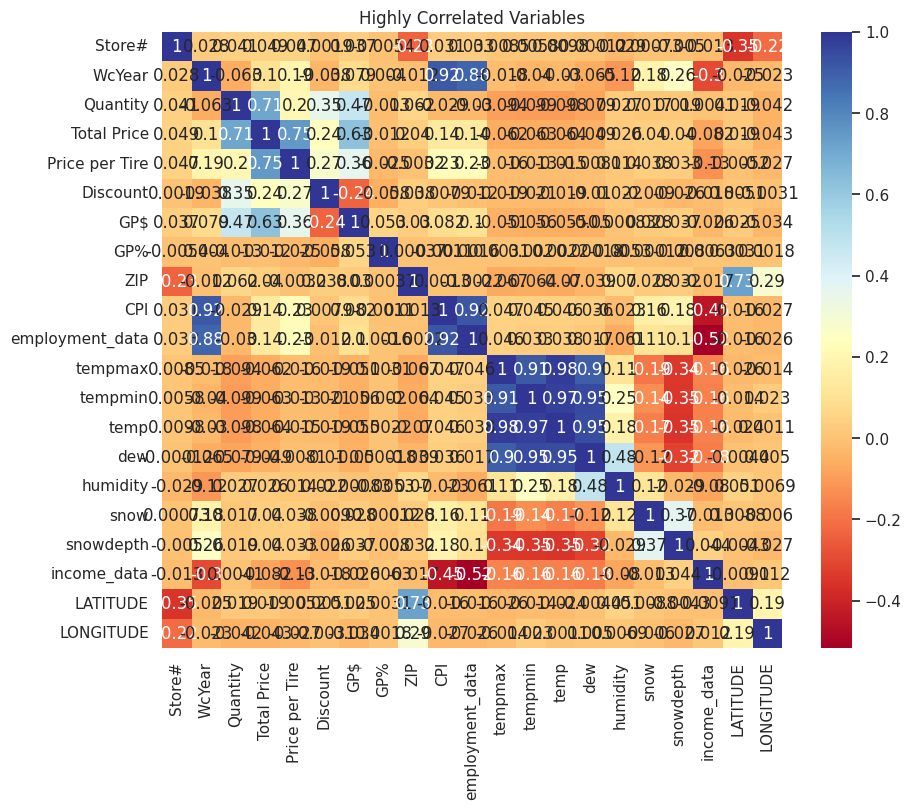

In [977]:

# Create a correlation matrix
cor_matrix = total_records.corr()

# Set the correlation threshold
threshold = 0.5

# Get the highly correlated variables
highly_correlated_vars = cor_matrix[abs(cor_matrix) > threshold]

# Get the column names of highly correlated variables
cols_to_keep = highly_correlated_vars.dropna(how='all', axis=0).dropna(how='all', axis=1).columns

# Subset the original data with the highly correlated variables
subset_data = total_records[cols_to_keep]

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(subset_data.corr(), annot=True, cmap="RdYlBu")
plt.title("Highly Correlated Variables")
plt.show()

In [978]:
total_records['SaleYear'] = pd.DatetimeIndex(total_records['Date']).year
total_records['SaleMonth'] = pd.DatetimeIndex(total_records['Date']).month
total_records['SaleDay'] = pd.DatetimeIndex(total_records['Date']).day

<ipython-input-978-60aaf3ab440a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  total_records['SaleYear'] = pd.DatetimeIndex(total_records['Date']).year
<ipython-input-978-60aaf3ab440a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  total_records['SaleMonth'] = pd.DatetimeIndex(total_records['Date']).month
<ipython-input-978-60aaf3ab440a>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  total_records['SaleDay'] = pd.DatetimeIndex(total_records['Date']).day


In [979]:
total_records.head()

,CustomerId,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,...,snow,snowdepth,conditions,icon,income_data,LATITUDE,LONGITUDE,SaleYear,SaleMonth,SaleDay
0,1111-3,14,2023,JEEP TRUCK,13-01-2023,2457517GOO758177707,1,196.99,196.99,0.00,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
1,BEAE68-1,14,2023,SUBARU TRUCK,13-01-2023,2156016MIMLSX48,4,423.96,105.99,0.00,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
2,COFM14-1,14,2023,TOYOTA,13-01-2023,2155517GOO767340537,2,418.84,209.42,0.00,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
3,FALA14-1,14,2023,HONDA,13-01-2023,2055516VRE8714692361395,4,299.97,99.99,99.99,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
4,FISK1-5,14,2023,INFINITI,13-01-2023,2554519UNI36294,1,178.54,178.54,0.00,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13


In [980]:
total_records

,CustomerId,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,...,snow,snowdepth,conditions,icon,income_data,LATITUDE,LONGITUDE,SaleYear,SaleMonth,SaleDay
0,1111-3,14,2023,JEEP TRUCK,13-01-2023,2457517GOO758177707,1,196.99,196.99,0.00,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
1,BEAE68-1,14,2023,SUBARU TRUCK,13-01-2023,2156016MIMLSX48,4,423.96,105.99,0.00,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
2,COFM14-1,14,2023,TOYOTA,13-01-2023,2155517GOO767340537,2,418.84,209.42,0.00,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
3,FALA14-1,14,2023,HONDA,13-01-2023,2055516VRE8714692361395,4,299.97,99.99,99.99,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
4,FISK1-5,14,2023,INFINITI,13-01-2023,2554519UNI36294,1,178.54,178.54,0.00,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184189,HARD53-3,53,2022,DODGE-RAM TRUCK,13-03-2022,2657017MIM4SX87,1,183.91,183.91,0.00,...,0.0,0.2,Partially cloudy,partly-cloudy-day,15064.1,42.574170,-71.280520,2022,3,13
184190,MERT1-51,53,2022,Unknown,13-03-2022,2057514PWKMAXV36,2,153.98,76.99,0.00,...,0.0,0.2,Partially cloudy,partly-cloudy-day,15064.1,42.574170,-71.280520,2022,3,13
184191,MATR53-1,53,2021,MERCURY,01-03-2021,2156016SLRSLR48,2,115.98,57.99,0.00,...,0.0,0.1,"Rain, Partially cloudy",rain,19213.9,42.574170,-71.280520,2021,1,3
184192,SINU53-1,53,2021,MERCEDES BENZ TRUCK,01-03-2021,2755519MIC18269,4,1140.24,295.06,40.00,...,0.0,0.1,"Rain, Partially cloudy",rain,19213.9,42.574170,-71.280520,2021,1,3


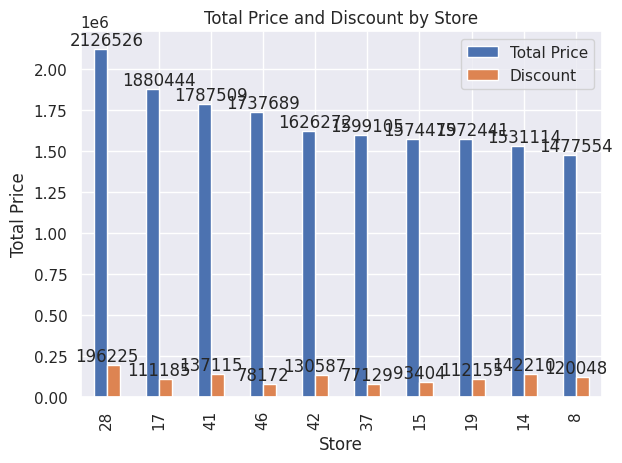

In [981]:
# Group the data by store and calculate the total price and discount
grouped_data = total_records.groupby('Store#').agg({'Total Price': 'sum', 'Discount': 'sum'})
top_10 = grouped_data.nlargest(10, 'Total Price')

# Create the bar chart
fig, ax = plt.subplots()
top_10.plot(kind='bar', ax=ax)

# Add the values on top of the bars
for i, v in enumerate(top_10['Discount']):
    ax.text(i, v, f'{v:.0f}', ha='center', va='bottom')
for i, v in enumerate(top_10['Total Price']):
    ax.text(i, v, f'{v:.0f}', ha='center', va='bottom')
# Customize the plot
ax.set_xlabel('Store')
ax.set_ylabel('Total Price')
ax.set_title('Total Price and Discount by Store')
plt.tight_layout()  # Adjusts the spacing between subplots and labels
plt.show()


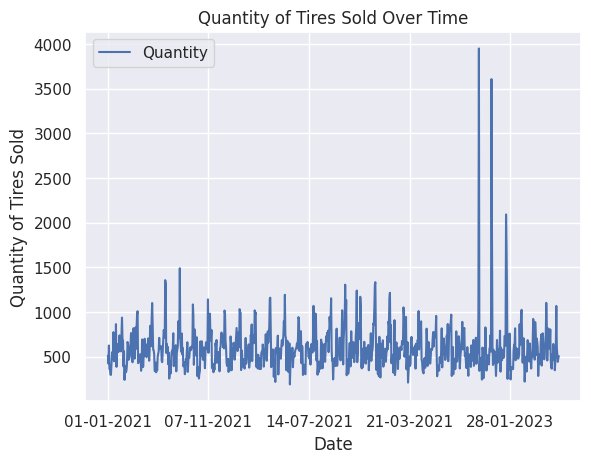

In [982]:
# Group the data by the 'Date' and calculate the sum of 'Quantity'
group_data = total_records.groupby('Date').agg({'Quantity': 'sum'})

# Create the line plot
fig, ax = plt.subplots()
group_data.plot(kind='line', ax=ax)

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Quantity of Tires Sold')
ax.set_title('Quantity of Tires Sold Over Time')

plt.show()

In [983]:
# Getting All Unique sku codes in a set
sku_lst = set([i for i in total_records['sku']])
len(sku_lst)

10235

In [984]:
state_profit = total_records.groupby('STATE')['GP$'].sum()

In [985]:
most_profitable_state = state_profit.idxmax()

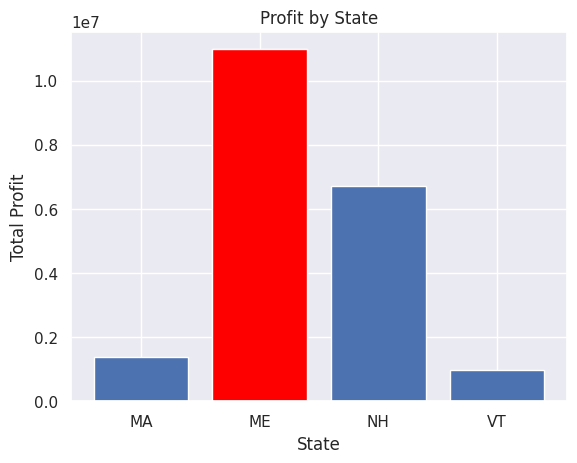

In [986]:
fig, ax = plt.subplots()
# Plot the histogram
ax.bar(state_profit.index, state_profit.values)


# Add labels and title
ax.set_xlabel('State')
ax.set_ylabel('Total Profit')
ax.set_title('Profit by State')

# Highlight the most profitable state
ax.bar(most_profitable_state, state_profit[most_profitable_state], color='red')

# Show the plot
plt.show()

In [987]:
store_profit = total_records.groupby('Store#')['GP$'].sum()

In [988]:
most_profitable_store = store_profit.idxmax()
most_profitable_store

46

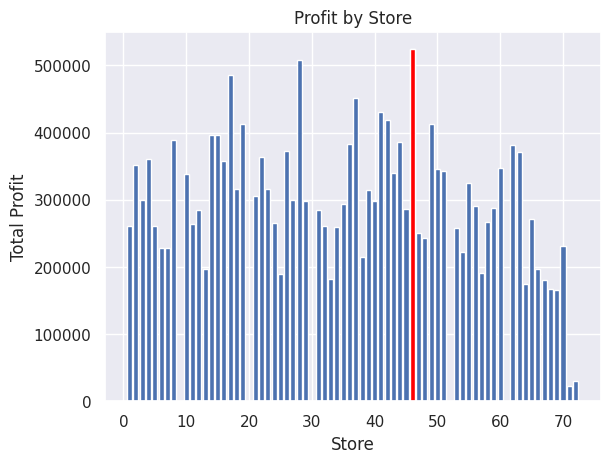

In [989]:
fig, ax = plt.subplots()

# Plot the histogram
ax.bar(store_profit.index, store_profit.values)

# Add labels and title
ax.set_xlabel('Store')
ax.set_ylabel('Total Profit')
ax.set_title('Profit by Store')

# Highlight the most profitable state
ax.bar(most_profitable_store, store_profit[most_profitable_store], color='red')

# Show the plot
plt.show()

In [990]:
#MA - Massachusetts
#ME - Maine
#NH - New Hampshire
#VT - Vermont

In [991]:
unique_states = total_records['STATE'].unique()
print(unique_states)

['ME' 'NH' 'VT' 'MA']


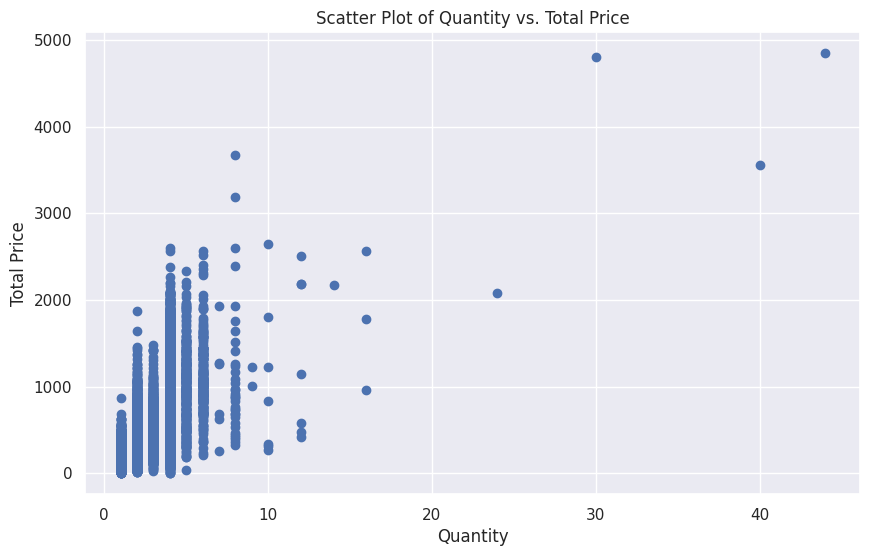

In [992]:
plt.figure(figsize=(10, 6))
plt.scatter(total_records['Quantity'], total_records['Total Price'])
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.title('Scatter Plot of Quantity vs. Total Price')
plt.show()

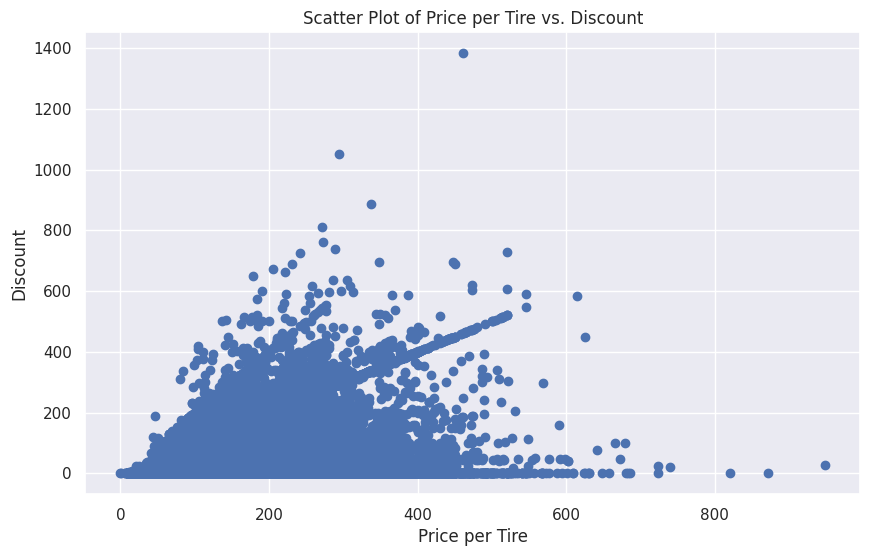

In [993]:
plt.figure(figsize=(10, 6))
plt.scatter(total_records['Price per Tire'], total_records['Discount'])
plt.xlabel('Price per Tire')
plt.ylabel('Discount')
plt.title('Scatter Plot of Price per Tire vs. Discount')
plt.show()

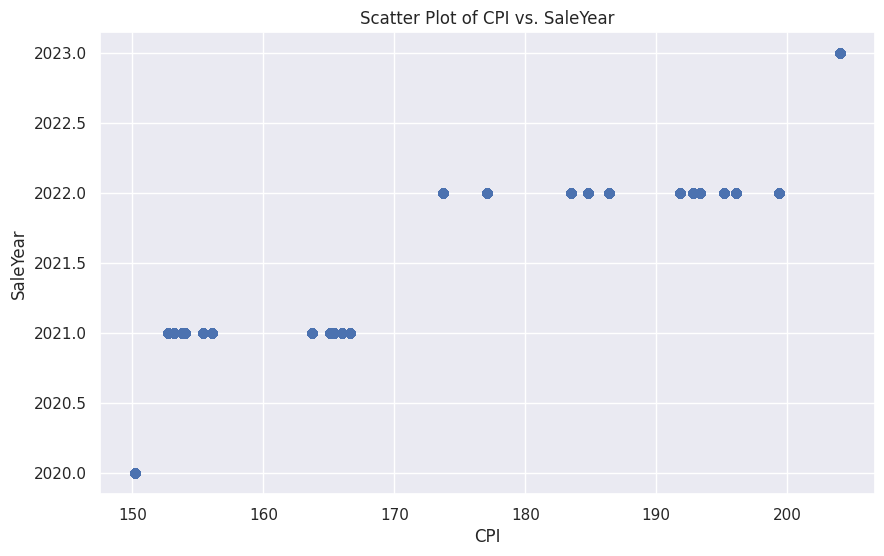

In [994]:
plt.figure(figsize=(10, 6))
plt.scatter(total_records['CPI'], total_records['SaleYear'])
plt.xlabel('CPI')
plt.ylabel('SaleYear')
plt.title('Scatter Plot of CPI vs. SaleYear')
plt.show()

In [995]:
total_records.isnull().sum()

CustomerId             0
Store#                 0
WcYear                 0
WcMakeText             0
Date                   0
sku                    0
Quantity               0
Total Price            0
Price per Tire         0
Discount               0
GP$                    0
GP%                    0
ZIP                    0
STREET                 0
CITY                   0
STATE                  0
name                   0
season                 0
CPI                    0
employment_data        0
datetime               0
tempmax                0
tempmin                0
temp                   0
dew                    0
humidity               0
preciptype         91353
snow                   0
snowdepth              0
conditions             0
icon                   0
income_data            0
LATITUDE               0
LONGITUDE              0
SaleYear               0
SaleMonth              0
SaleDay                0
dtype: int64

In [996]:
#Linear Regression

In [997]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [998]:
X = total_records[['Store#', 'CPI' , 'Quantity', 'Price per Tire']]  # Adjust the feature columns as per your needs
y = total_records['Total Price']  # Adjust the target variable column as per your needs

In [999]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust the test_size and random_state as desired

In [1000]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1001]:
r2_score = model.score(X_test, y_test)
print("R-squared score:", r2_score)

R-squared score: 0.8891531370630759


In [1002]:
y_pred = model.predict(X_test)

In [1003]:
# R2 is 88% hence a good model

In [1004]:
#logistic regression

In [1005]:
from sklearn.linear_model import LogisticRegression

# Target Tire

In [1006]:
columns_to_keep = ['SaleYear', 'name', 'Quantity']
df_filtered = total_records[columns_to_keep]

In [1007]:
grouped_df = df_filtered.groupby(['SaleYear', 'name'])['Quantity'].sum().reset_index()

In [1008]:
grouped_df.head()

,SaleYear,name,Quantity
0,2020,Americus,4
1,2020,Armstrong,126
2,2020,BF Goodrich,2443
3,2020,Bridgestone,1317
4,2020,Carlisle,65


In [1009]:
grouped_df['name'].value_counts()

Americus       4
Kenda          4
Laufenn        4
Mastercraft    4
Mesa           4
              ..
Duraturn       1
Dynacargo      1
Federal        1
Riken          1
WestLake       1
Name: name, Length: 91, dtype: int64

In [1010]:
targets = {
    'Michelin': 30000,
    'BF Goodrich':30000,
    'Uniroyal':30000,
    'Goodyear': 62000,
    'Dunlop' : 62000,
    'Kelly': 62000,
    'Sumitomo': 120000,
    'Multi-Mile':120000,
    'Falken':24000

}

In [1011]:
grouped_df['TargetAchieved'] = grouped_df.apply(lambda row: row['Quantity'] >= targets.get(row['name'], 0), axis=1)

In [1012]:
top_10 = grouped_df.nlargest(10, 'Quantity')

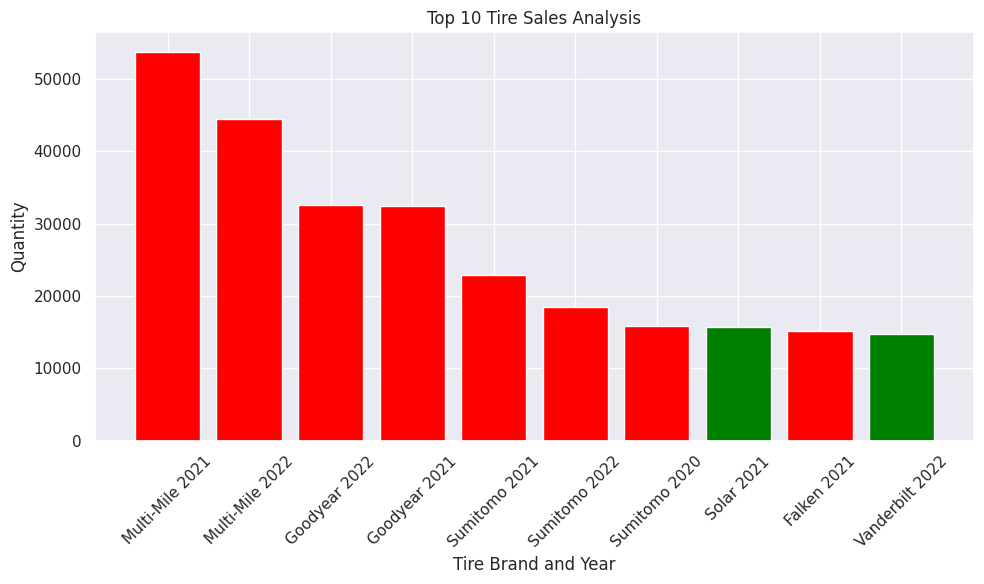

In [1013]:
plt.figure(figsize=(10, 6))
colors = top_10['TargetAchieved'].map({True: 'green', False: 'red'})
plt.bar(top_10['name'] + ' ' + top_10['SaleYear'].astype(str), top_10['Quantity'], color=colors)
plt.xlabel('Tire Brand and Year')
plt.ylabel('Quantity')
plt.title('Top 10 Tire Sales Analysis')

plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
plt.tight_layout()
plt.show()



In [1014]:
# Sort the DataFrame by the quantity of tires sold in descending order
grouped_df_sorted = grouped_df.sort_values('Quantity', ascending=False)
# Split the data into two subsets: target achieved and target not achieved
target_achieved = grouped_df_sorted[grouped_df_sorted['TargetAchieved']]
target_not_achieved = grouped_df_sorted[~grouped_df_sorted['TargetAchieved']]


In [1015]:
# Select the top 10 tire brands for each subset
top_10_achieved = target_achieved.nlargest(10, 'Quantity')
top_10_not_achieved = target_not_achieved.nlargest(10, 'Quantity')

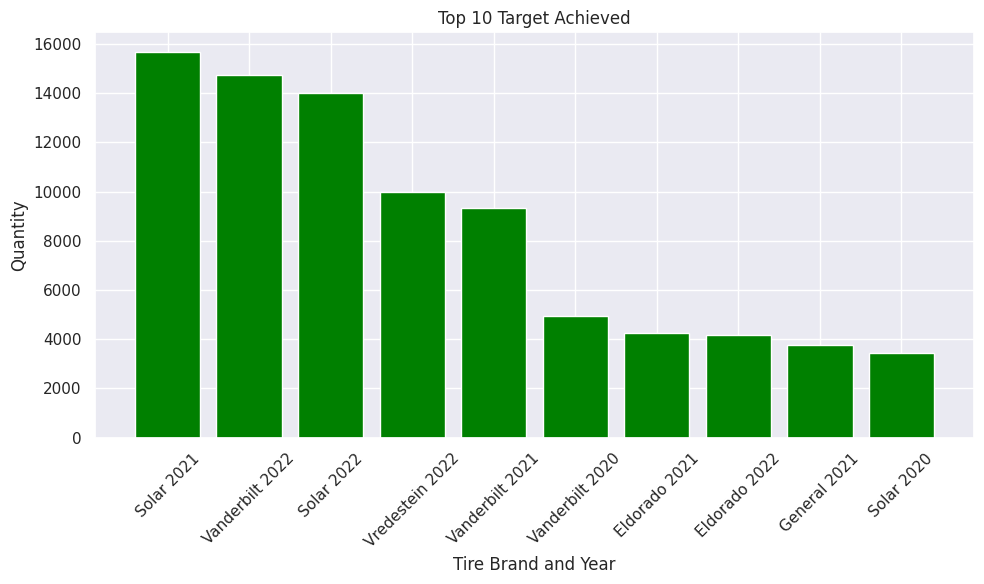

In [1016]:
# Plot the target achieved subset
plt.figure(figsize=(10, 6))
plt.bar(top_10_achieved['name'] + ' ' + top_10_achieved['SaleYear'].astype(str), top_10_achieved['Quantity'], color='green')
plt.xlabel('Tire Brand and Year')
plt.ylabel('Quantity')
plt.title('Top 10 Target Achieved')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
plt.tight_layout()
plt.show()

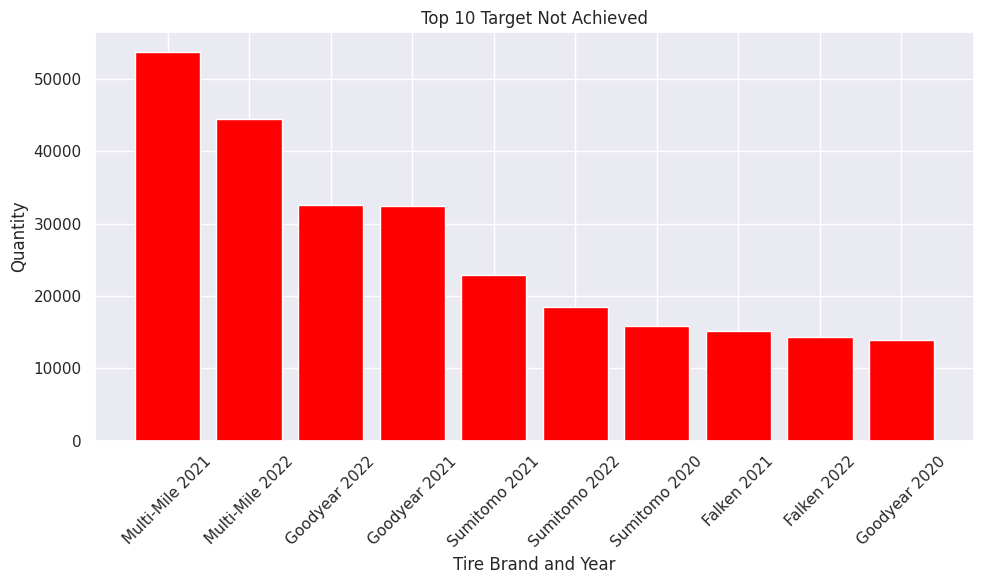

In [1017]:
# Plot the target not achieved subset
plt.figure(figsize=(10, 6))
plt.bar(top_10_not_achieved['name'] + ' ' + top_10_not_achieved['SaleYear'].astype(str), top_10_not_achieved['Quantity'], color='red')
plt.xlabel('Tire Brand and Year')
plt.ylabel('Quantity')
plt.title('Top 10 Target Not Achieved')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
plt.tight_layout()
plt.show()


# checking based on seasons

In [1018]:
total_records.dtypes

CustomerId          object
Store#               int64
WcYear               int64
WcMakeText          object
Date                object
sku                 object
Quantity             int64
Total Price        float64
Price per Tire     float64
Discount           float64
GP$                float64
GP%                float64
ZIP                  int64
STREET              object
CITY                object
STATE               object
name                object
season              object
CPI                float64
employment_data    float64
datetime            object
tempmax            float64
tempmin            float64
temp               float64
dew                float64
humidity           float64
preciptype          object
snow               float64
snowdepth          float64
conditions          object
icon                object
income_data        float64
LATITUDE           float64
LONGITUDE          float64
SaleYear             int64
SaleMonth            int64
SaleDay              int64
d

In [1019]:
#clustering

In [1020]:
total_records.describe()

,Store#,WcYear,Quantity,Total Price,Price per Tire,Discount,GP$,GP%,ZIP,CPI,...,dew,humidity,snow,snowdepth,income_data,LATITUDE,LONGITUDE,SaleYear,SaleMonth,SaleDay
count,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,...,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000,184194.000000
mean,33.787121,2021.428347,2.895018,416.183415,148.222003,30.767185,108.889679,27.761689,3949.517704,173.858262,...,36.152268,68.953164,0.144380,0.526171,15604.779380,43.895640,-70.725057,2021.428347,6.926561,15.957458
std,19.461542,0.802105,1.308950,289.108345,67.084970,62.955261,98.231593,186.067567,822.089613,18.320668,...,18.480502,14.566838,0.937389,1.765821,727.936816,0.925771,2.744673,0.802105,3.580035,8.536651
min,1.000000,2020.000000,1.000000,0.040000,0.010000,0.000000,-1017.240000,-69646.670000,1603.000000,150.200000,...,-27.000000,25.600000,0.000000,0.000000,14973.100000,42.250003,-93.209041,2020.000000,1.000000,1.000000
25%,17.000000,2021.000000,2.000000,180.540000,98.990000,0.000000,41.940000,20.000000,3561.000000,155.400000,...,22.500000,58.600000,0.000000,0.000000,15172.200000,43.376328,-71.448878,2021.000000,4.000000,10.000000
50%,34.000000,2021.000000,4.000000,358.670000,134.990000,0.000000,85.300000,29.650000,4073.000000,166.641000,...,34.900000,69.000000,0.000000,0.000000,15536.500000,43.808564,-70.447417,2021.000000,7.000000,16.000000
75%,49.000000,2022.000000,4.000000,586.480000,185.990000,32.000000,157.800000,39.200000,4412.000000,192.785000,...,52.000000,80.100000,0.000000,0.100000,15708.600000,44.462448,-69.823180,2022.000000,10.000000,23.000000
max,72.000000,2023.000000,44.000000,4845.770000,948.390000,1383.000000,2594.840000,100.000000,5701.000000,204.009000,...,71.900000,99.700000,19.700000,20.600000,19213.900000,47.356039,-67.296366,2023.000000,12.000000,31.000000


In [1021]:
total_records[total_records['GP$']<0]

,CustomerId,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,...,snow,snowdepth,conditions,icon,income_data,LATITUDE,LONGITUDE,SaleYear,SaleMonth,SaleDay
20,BESD1-17,14,2022,DODGE-RAM TRUCK,25-11-2022,2857017SUMATH83,4,600.00,200.00,200.00,...,0.0,0.0,"Rain, Partially cloudy",rain,15332.9,43.410838,-70.741684,2022,11,25
62,REEL14-1,14,2022,Unknown,17-05-2022,2010008CAR5111011,1,51.04,66.04,15.00,...,0.0,0.0,Partially cloudy,partly-cloudy-day,15036.4,43.410838,-70.741684,2022,5,17
106,WOOS14-4,14,2023,NISSAN-DATSUN,10-01-2023,2055017ELDVEP90,1,59.77,95.99,36.22,...,0.0,0.7,Partially cloudy,partly-cloudy-day,15590.8,43.410838,-70.741684,2023,10,1
245,TALD14-1,14,2022,NISSAN-DATSUN,29-11-2022,2256018FAL59000460,4,560.04,219.99,319.92,...,0.0,0.0,Clear,clear-day,15332.9,43.410838,-70.741684,2022,11,29
258,KAPB14-1,14,2023,NISSAN-DATSUN,24-01-2023,2055516BFG90759,4,344.62,122.99,147.34,...,0.1,18.2,Partially cloudy,snow,15590.8,43.410838,-70.741684,2023,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183772,BEAH1-35,53,2020,TOYOTA,23-11-2020,2056516GOO767780537,4,425.97,141.99,141.99,...,0.0,0.0,"Rain, Partially cloudy",rain,15522.5,42.574170,-71.280520,2020,11,23
183781,DODK1-14,53,2020,FORD TRUCK,02-11-2020,2557018BRI057945,4,653.97,217.99,217.99,...,0.0,0.0,Partially cloudy,partly-cloudy-day,15522.5,42.574170,-71.280520,2020,2,11
183912,TOWC1-22,53,2023,Unknown,30-03-2023,2256017FIR005360,1,174.00,174.00,0.00,...,0.0,0.0,Partially cloudy,partly-cloudy-day,15660.3,42.574170,-71.280520,2023,3,30
184003,TOWC1-22,53,2022,Unknown,11-01-2022,4808CTW598904,10,270.00,45.99,189.90,...,0.0,0.0,Partially cloudy,partly-cloudy-day,15137.7,42.574170,-71.280520,2022,11,1


In [1022]:
#adding database
df= total_records

In [1023]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [1024]:
total_records.head()

,CustomerId,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,...,snow,snowdepth,conditions,icon,income_data,LATITUDE,LONGITUDE,SaleYear,SaleMonth,SaleDay
0,1111-3,14,2023,JEEP TRUCK,13-01-2023,2457517GOO758177707,1,196.99,196.99,0.00,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
1,BEAE68-1,14,2023,SUBARU TRUCK,13-01-2023,2156016MIMLSX48,4,423.96,105.99,0.00,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
2,COFM14-1,14,2023,TOYOTA,13-01-2023,2155517GOO767340537,2,418.84,209.42,0.00,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
3,FALA14-1,14,2023,HONDA,13-01-2023,2055516VRE8714692361395,4,299.97,99.99,99.99,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13
4,FISK1-5,14,2023,INFINITI,13-01-2023,2554519UNI36294,1,178.54,178.54,0.00,...,1.3,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13


In [1025]:

# Select the relevant columns for clustering
selected_columns = ['Quantity', 'Total Price', 'Price per Tire', 'GP$', 'GP%']
data = df[selected_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform K-means clustering
k = 5  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=selected_columns)

# Print cluster summary
print(cluster_summary)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Quantity  Total Price  Price per Tire         GP$           GP%
0  3.983231   885.124074      233.697933  230.863785     27.330249
1  1.472928   139.338159       98.039189   47.544521     33.898929
2  3.986317   454.702889      127.743740  110.741075     24.950308
3  1.000000     0.150000      139.500000 -104.470000 -69646.670000
4  1.531063   302.145467      207.176768   78.083106     25.073184


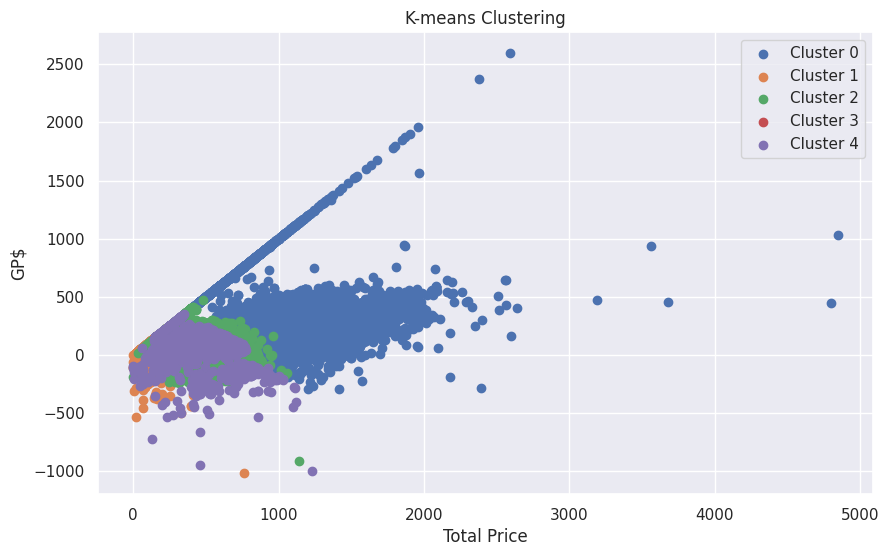

In [1026]:
# Select two features for plotting (e.g., 'Total Price' and 'GP$')
x_feature = 'Total Price'
y_feature = 'GP$'

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(k):
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {cluster_label}')

# Add labels and title to the plot
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('K-means Clustering')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [1027]:
# Calculate mean values for each feature within each cluster
cluster_profile = df.groupby('Cluster')[selected_columns].mean()
print(cluster_profile)

         Quantity  Total Price  Price per Tire         GP$           GP%
Cluster                                                                 
0        3.982951   884.902882      233.678323  230.746899     27.322390
1        1.472669   139.182847       97.950201   47.509848     33.907458
2        3.986298   454.615953      127.725436  110.706198     24.947320
3        1.000000     0.150000      139.500000 -104.470000 -69646.670000
4        1.530460   301.635933      206.905689   78.093023     25.104199


<ipython-input-1028-e0bf42383535>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_comparison = df.groupby('Cluster')['Quantity', 'Total Price', 'Price per Tire'].mean()


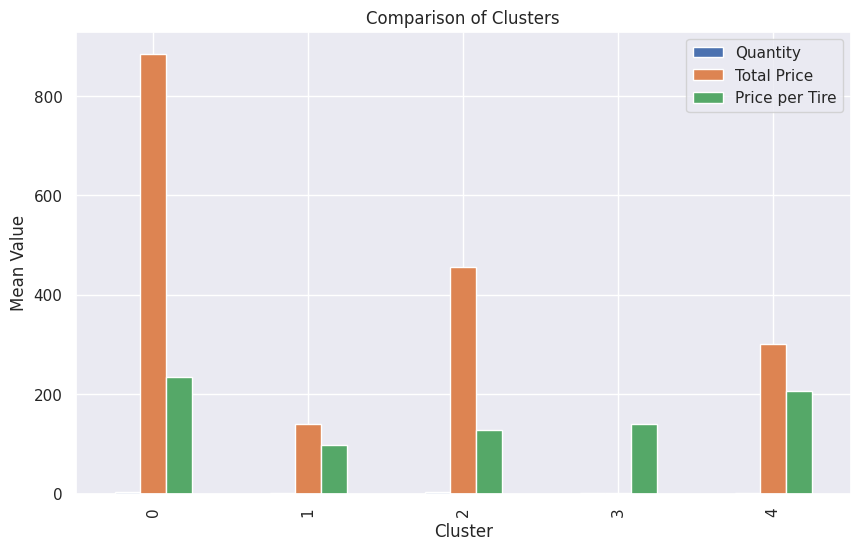

In [1028]:
# Calculate mean values for each feature across all clusters
cluster_comparison = df.groupby('Cluster')['Quantity', 'Total Price', 'Price per Tire'].mean()

# Compare clusters by plotting a bar chart
cluster_comparison.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Comparison of Clusters')
plt.legend(loc='upper right')
plt.show()

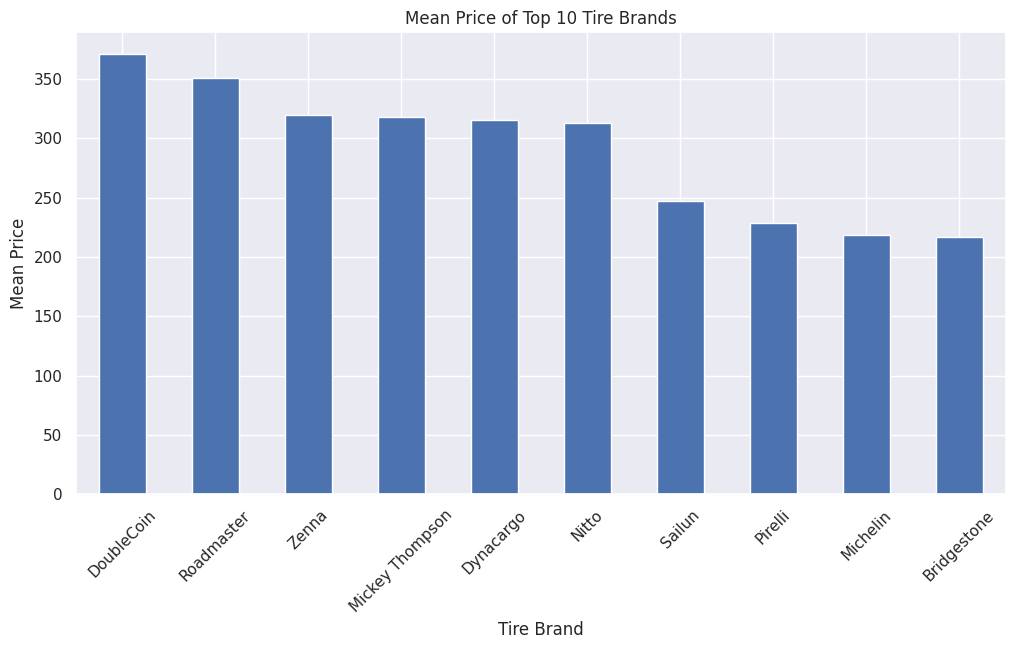

In [1029]:
# Group prices by tire brand and calculate the mean price
grouped_prices = total_records.groupby('name')['Price per Tire'].mean()

# Sort the mean prices in descending order and select the top 10 brands
top_10_brands = grouped_prices.sort_values(ascending=False).head(10)

# Plot the mean prices of the top 10 brands
plt.figure(figsize=(12, 6))
top_10_brands.plot(kind='bar')
plt.title('Mean Price of Top 10 Tire Brands')
plt.xlabel('Tire Brand')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()

In [1030]:
cluster_3_data = df[df['Cluster'] == 3]


In [1031]:
# Perform analysis on Cluster 3
# Example analysis: Compute the average and maximum values of 'Total Price' in Cluster 3
average_total_price_cluster_3 = cluster_3_data['Total Price'].mean()
maximum_total_price_cluster_3 = cluster_3_data['Total Price'].max()

# Print the analysis results
print("Cluster 3 Analysis:")
print("Average Total Price:", average_total_price_cluster_3)
print("Maximum Total Price:", maximum_total_price_cluster_3)

Cluster 3 Analysis:
Average Total Price: 0.15
Maximum Total Price: 0.15


In [1032]:
cluster_3_data['Store#'].value_counts()

46    1
Name: Store#, dtype: int64

In [1033]:
cluster_3_data.shape

(1, 38)

In [1034]:
cluster_3_data

,CustomerId,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,...,snowdepth,conditions,icon,income_data,LATITUDE,LONGITUDE,SaleYear,SaleMonth,SaleDay,Cluster
107763,BURA46-1,46,2020,SUBARU,22-12-2020,2256017GOO407723374,1,0.15,139.5,139.35,...,7.3,Partially cloudy,partly-cloudy-day,15536.5,43.362377,-72.308038,2020,12,22,3


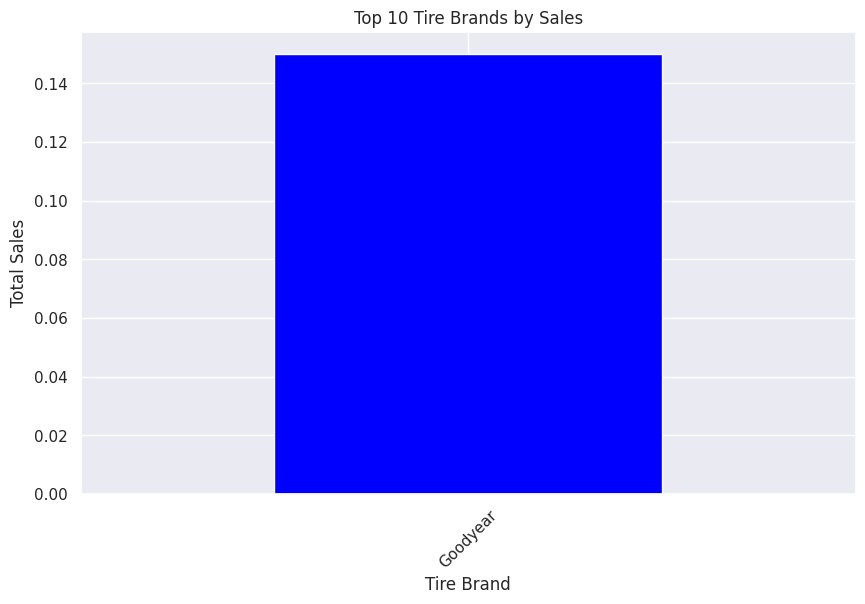

In [1035]:
# Group the data by 'sku' and calculate the total sum of 'Total Price' for each tire brand
brand_sales = cluster_3_data.groupby('name')['Total Price'].sum().sort_values(ascending=False)

# Select the top 10 tire brands with the highest sales
top_10_brands = brand_sales.head(10)

# Plot the top 10 tire brands
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar', color='blue')
plt.title('Top 10 Tire Brands by Sales')
plt.xlabel('Tire Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

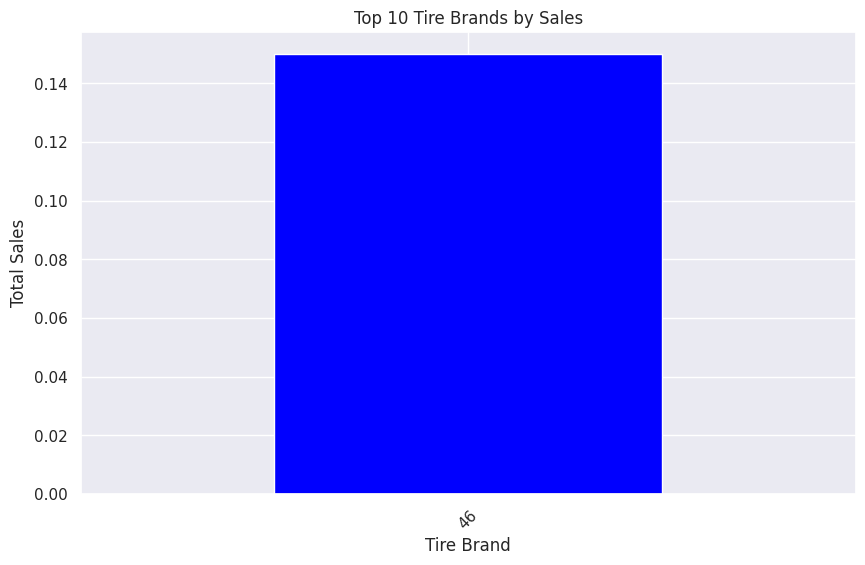

In [1036]:
# Group the data by 'store' and calculate the total sum of 'Total Price' for each tire brand
brand_sales = cluster_3_data.groupby('Store#')['Total Price'].sum().sort_values(ascending=False)

# Select the top 10 tire brands with the highest sales
top_10_brands = brand_sales.head(10)

# Plot the top 10 tire brands
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar', color='blue')
plt.title('Top 10 Tire Brands by Sales')
plt.xlabel('Tire Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [1037]:
mask = np.logical_and(df['name'] != 'Multi-Mile', df['name'] != 'Goodyear')
mask = np.logical_and(mask, df['name'] != 'Sumitomo')
mask = np.logical_and(mask, df['name'] != 'Solar')
mask = np.logical_and(mask, df['name'] != 'Falken')
mask = np.logical_and(mask, df['name'] != 'Michelin')
mask = np.logical_and(mask, df['name'] != 'Vanderbilt')
mask = np.logical_and(mask, df['name'] != 'BF Goodrich')

df.loc[mask, 'name'] = 'Non-Primary'

In [1038]:
df['name'].value_counts()

Multi-Mile     43819
Non-Primary    41420
Goodyear       27412
Sumitomo       19102
Solar          15041
Falken         10788
Michelin        9566
Vanderbilt      9314
BF Goodrich     7732
Name: name, dtype: int64

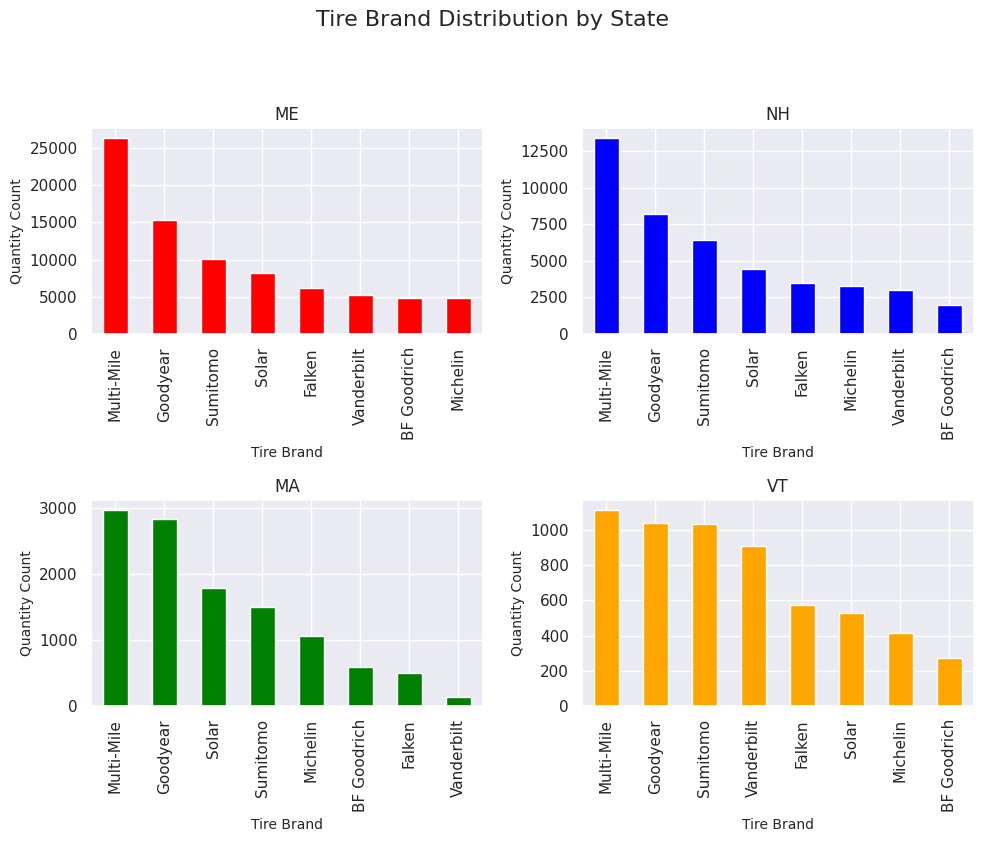

In [1039]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot for 'ME'
value_counts_for_ME = df[df['STATE'] == 'ME']['name'].value_counts()
value_counts_for_ME[~(value_counts_for_ME.index == 'Non-Primary')].plot(kind='bar', ax=axes[0, 0], color='red')
axes[0, 0].set_title('ME', fontsize=12)
axes[0, 0].set_xlabel('Tire Brand', fontsize=10)
axes[0, 0].set_ylabel('Quantity Count', fontsize=10)

# Plot for 'NH'
value_counts_for_NH = df[df['STATE'] == 'NH']['name'].value_counts()
value_counts_for_NH[~(value_counts_for_NH.index == 'Non-Primary')].plot(kind='bar', ax=axes[0, 1], color='blue')
axes[0, 1].set_title('NH', fontsize=12)
axes[0, 1].set_xlabel('Tire Brand', fontsize=10)
axes[0, 1].set_ylabel('Quantity Count', fontsize=10)

# Plot for 'MA'
value_counts_for_MA = df[df['STATE'] == 'MA']['name'].value_counts()
value_counts_for_MA[~(value_counts_for_MA.index == 'Non-Primary')].plot(kind='bar', ax=axes[1, 0], color='green')
axes[1, 0].set_title('MA', fontsize=12)
axes[1, 0].set_xlabel('Tire Brand', fontsize=10)
axes[1, 0].set_ylabel('Quantity Count', fontsize=10)

# Plot for 'VT'
value_counts_for_VT = df[df['STATE'] == 'VT']['name'].value_counts()
value_counts_for_VT[~(value_counts_for_VT.index == 'Non-Primary')].plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('VT', fontsize=12)
axes[1, 1].set_xlabel('Tire Brand', fontsize=10)
axes[1, 1].set_ylabel('Quantity Count', fontsize=10)

# Set the overall plot title
plt.suptitle('Tire Brand Distribution by State', fontsize=16, y=1.05)



# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

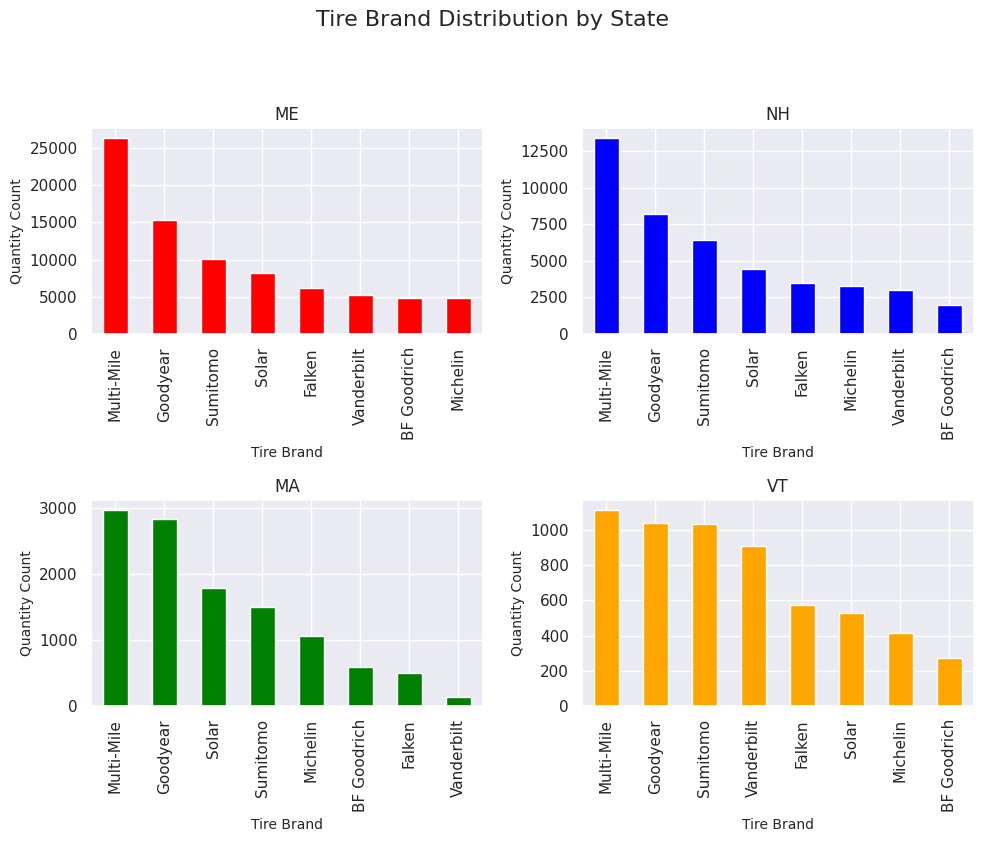

In [1040]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot for 'ME'
value_counts_for_ME = df[df['STATE'] == 'ME']['name'].value_counts()
value_counts_for_ME[~(value_counts_for_ME.index == 'Non-Primary')].plot(kind='bar', ax=axes[0, 0], color='red')
axes[0, 0].set_title('ME', fontsize=12)
axes[0, 0].set_xlabel('Tire Brand', fontsize=10)
axes[0, 0].set_ylabel('Quantity Count', fontsize=10)

# Plot for 'NH'
value_counts_for_NH = df[df['STATE'] == 'NH']['name'].value_counts()
value_counts_for_NH[~(value_counts_for_NH.index == 'Non-Primary')].plot(kind='bar', ax=axes[0, 1], color='blue')
axes[0, 1].set_title('NH', fontsize=12)
axes[0, 1].set_xlabel('Tire Brand', fontsize=10)
axes[0, 1].set_ylabel('Quantity Count', fontsize=10)

# Plot for 'MA'
value_counts_for_MA = df[df['STATE'] == 'MA']['name'].value_counts()
value_counts_for_MA[~(value_counts_for_MA.index == 'Non-Primary')].plot(kind='bar', ax=axes[1, 0], color='green')
axes[1, 0].set_title('MA', fontsize=12)
axes[1, 0].set_xlabel('Tire Brand', fontsize=10)
axes[1, 0].set_ylabel('Quantity Count', fontsize=10)

# Plot for 'VT'
value_counts_for_VT = df[df['STATE'] == 'VT']['name'].value_counts()
value_counts_for_VT[~(value_counts_for_VT.index == 'Non-Primary')].plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('VT', fontsize=12)
axes[1, 1].set_xlabel('Tire Brand', fontsize=10)
axes[1, 1].set_ylabel('Quantity Count', fontsize=10)

# Set the overall plot title
plt.suptitle('Tire Brand Distribution by State', fontsize=16, y=1.05)



# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

In [1041]:
profit_by_state = df.groupby(['STATE', 'name'])['GP$'].sum().reset_index()

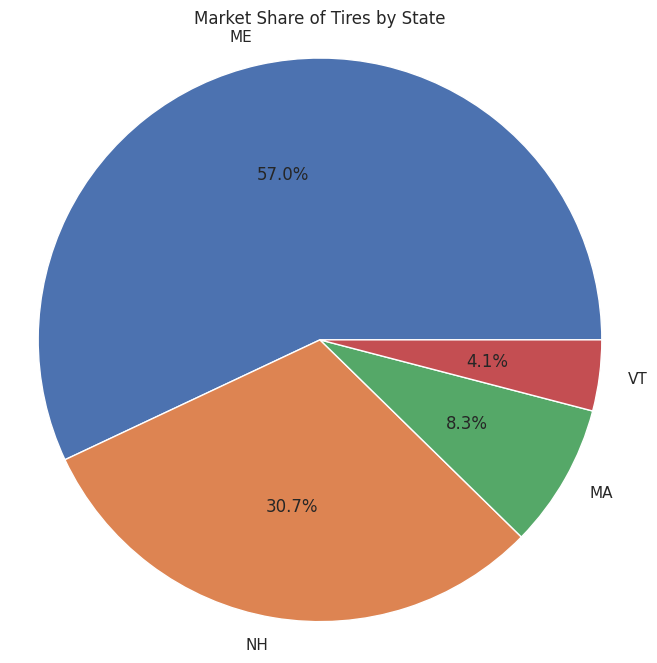

In [1042]:
# Pie Chart: Market share of each make of tires
make_counts = df['STATE'].value_counts()
labels = make_counts.index
sizes = make_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Market Share of Tires by State")
plt.axis('equal')
plt.show()


In [1043]:
df=total_records
df

,CustomerId,Store#,WcYear,WcMakeText,Date,sku,Quantity,Total Price,Price per Tire,Discount,...,snowdepth,conditions,icon,income_data,LATITUDE,LONGITUDE,SaleYear,SaleMonth,SaleDay,Cluster
0,1111-3,14,2023,JEEP TRUCK,13-01-2023,2457517GOO758177707,1,196.99,196.99,0.00,...,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13,4
1,BEAE68-1,14,2023,SUBARU TRUCK,13-01-2023,2156016MIMLSX48,4,423.96,105.99,0.00,...,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13,2
2,COFM14-1,14,2023,TOYOTA,13-01-2023,2155517GOO767340537,2,418.84,209.42,0.00,...,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13,4
3,FALA14-1,14,2023,HONDA,13-01-2023,2055516VRE8714692361395,4,299.97,99.99,99.99,...,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13,2
4,FISK1-5,14,2023,INFINITI,13-01-2023,2554519UNI36294,1,178.54,178.54,0.00,...,1.3,"Snow, Rain, Overcast",snow,15590.8,43.410838,-70.741684,2023,1,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184189,HARD53-3,53,2022,DODGE-RAM TRUCK,13-03-2022,2657017MIM4SX87,1,183.91,183.91,0.00,...,0.2,Partially cloudy,partly-cloudy-day,15064.1,42.574170,-71.280520,2022,3,13,4
184190,MERT1-51,53,2022,Unknown,13-03-2022,2057514PWKMAXV36,2,153.98,76.99,0.00,...,0.2,Partially cloudy,partly-cloudy-day,15064.1,42.574170,-71.280520,2022,3,13,1
184191,MATR53-1,53,2021,MERCURY,01-03-2021,2156016SLRSLR48,2,115.98,57.99,0.00,...,0.1,"Rain, Partially cloudy",rain,19213.9,42.574170,-71.280520,2021,1,3,1
184192,SINU53-1,53,2021,MERCEDES BENZ TRUCK,01-03-2021,2755519MIC18269,4,1140.24,295.06,40.00,...,0.1,"Rain, Partially cloudy",rain,19213.9,42.574170,-71.280520,2021,1,3,0


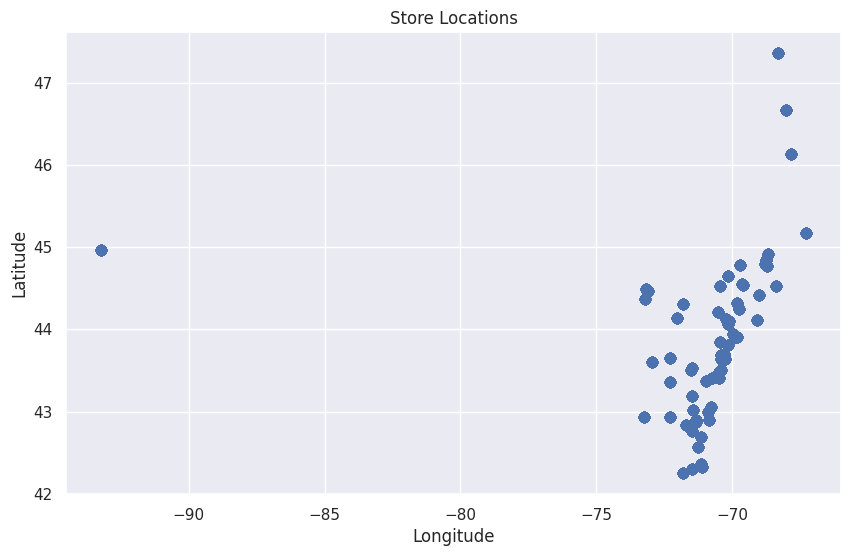

In [1044]:
# Map Plot: Store locations
plt.figure(figsize=(10, 6))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], marker='o', s=50, alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Store Locations')
plt.grid(True)
plt.show()

In [1045]:
store_reviews={"Old Post Rd. Arundel":"4.7,422",
              "Center St. Auburn":"4.8,684",
              "Western Ave. Augusta":"4.5,710",
              "Bangor Tire Company":"4.5,471",
              "Bath Rd. Brunswick":"4.4,140",
              "Starrett Dr. Belfast":"4.6,510",
              "Alfred St. Biddeford":"4.6,500",
              "Wilson St. Brewer":"4.6,440",
              "Bath Rd. Brunswick":"4.6,418",
              "North St. Calais":"4.6,322",
              "Downeast Highway Ellsworth":"4.6,499",
              "Maine Ave. Farmingdale":"4.5,490",
              "Wilton Rd. Farmington":"4.5,407",
              "Main St. Gorham":"4.6,549",
              "North St. Houlton":"4.7,332",
              "Sabattus St. Lewiston":"4.5,357",
              "Lisbon St. Lewiston":"4.5,788",
              "Main St. Madawaska":"4.7,274",
              "River Rd. Mexico":"4.5,354",
              "Main St. Norway":"4.6,438",
              "Stillwater Ave. Old Town":"4.6,442",
              "Main Street Presque Isle":"4.4,349",
              "Camden St. Rockland":"4.6,444",
              "Ocean Park Rd. Saco":"4.6,977",
              "Main St. Sanford":"4.6,575",
              "Payne Rd. Scarborough":"4.7,525",
              "East Madison Ave. Skowhegan":"4.6,425",
              "Waterman Dr. South Portland":"4.5,470",
              "Union Park Topsham":"4.6,461",
              "Main St. Waterville":"4.6,630",
              "Riverside St. Portland":"4.5,629",
              "Amato Drive Windham":"4.6,1002",
              "Bay St. Winslow":"4.7,284",
              "U.S. Rt. 1 Yarmouth":"4.6,522",
              "So. River Rd. Bedford":"4.5,421",
              "Washington Street Claremont":"4.3,563",
              "Manchester St. Concord":"4.4,485",
              "Manchester Rd. Derry":"4.6,542",
              "Main St. Gorham":"4.4,363",
              "Intervale Dr. Hillsborough":"4.4,364",
              "Main St. Keene":"4.6,187",
              "Union Ave. Laconia":"4.6,597",
              "Meadow St. Littleton":"4.5,281",
              "Garden Lane Londonderry":"4.7,459",
              "Hooksett Rd. Manchester":"4.6,654",
              "Milford Rd. Merrimack":"4.5,370",
              "Jones Rd. Milford":"4.5,391",
              "Lafayette Rd. Portsmouth":"4.6,500",
              "Milton Rd. Rochester":"4.6,430",
              "Lafayette Rd, Seabrook":"4.8,74",
              "Waltons Way Somersworth":"4.6,655",
              "West Rd Suite A Stratham":"4.6,528",
              "Laconia Rd. Tilton":"4.4,424",
              "Railroad Avenue West Lebanon":"4.6,553",
              "Chase Lane Woodsville":"4.6,336",
              "Boston Rd., Rte. 3A Billerica":"4.5,320",
              "Boylston St Brookline":"4.9,272",
              "Worcester Rd Framingham":"4.8,225",
              "Winthrop Ave. Lawrence":"4.5,264",
              "Arsenal St. Watertown":"4.8,463",
              "Coes Square Worcester":"4.7,200",
              "North St, Bennington":"4.7,71",
              "Riverside Ave Burlington":"4.8,312",
              "Strongs Ave Rutland":"4.5,164",
              "Shelburne Rd, Shelburne":"4.8,309",
              "Essex Road Williston":"4.6,493"}

In [1046]:
df1=total_records

In [1047]:
df1['AVERAGE_REVIEW'] = 0.0  # Initialize the average review column
df1['TOTAL_COUNTS'] = 0  # Initialize the total counts column

# Iterate over the values in the 'CITY' column
for index, row in df1.iterrows():
    city = row['CITY']
    if city in store_reviews:
        review_info = store_reviews[city].split(',')
        average_review = float(review_info[0])
        total_counts = int(review_info[1])
        df1.at[index, 'AVERAGE_REVIEW'] = average_review
        df1.at[index, 'TOTAL_COUNTS'] = total_counts

print(df1)

       CustomerId  Store#  WcYear           WcMakeText        Date  \
0          1111-3      14    2023           JEEP TRUCK  13-01-2023   
1        BEAE68-1      14    2023         SUBARU TRUCK  13-01-2023   
2        COFM14-1      14    2023               TOYOTA  13-01-2023   
3        FALA14-1      14    2023                HONDA  13-01-2023   
4         FISK1-5      14    2023             INFINITI  13-01-2023   
...           ...     ...     ...                  ...         ...   
184189   HARD53-3      53    2022      DODGE-RAM TRUCK  13-03-2022   
184190   MERT1-51      53    2022              Unknown  13-03-2022   
184191   MATR53-1      53    2021              MERCURY  01-03-2021   
184192   SINU53-1      53    2021  MERCEDES BENZ TRUCK  01-03-2021   
184193   VIAK53-1      53    2021         TOYOTA TRUCK  01-03-2021   

                            sku  Quantity  Total Price  Price per Tire  \
0           2457517GOO758177707         1       196.99          196.99   
1          

In [1048]:
df1.isnull().sum()

CustomerId             0
Store#                 0
WcYear                 0
WcMakeText             0
Date                   0
sku                    0
Quantity               0
Total Price            0
Price per Tire         0
Discount               0
GP$                    0
GP%                    0
ZIP                    0
STREET                 0
CITY                   0
STATE                  0
name                   0
season                 0
CPI                    0
employment_data        0
datetime               0
tempmax                0
tempmin                0
temp                   0
dew                    0
humidity               0
preciptype         91353
snow                   0
snowdepth              0
conditions             0
icon                   0
income_data            0
LATITUDE               0
LONGITUDE              0
SaleYear               0
SaleMonth              0
SaleDay                0
Cluster                0
AVERAGE_REVIEW         0
TOTAL_COUNTS           0


In [1049]:
df1['AVERAGE_REVIEW'] = 0.0  # Initialize the average review column
df1['TOTAL_COUNTS'] = 0  # Initialize the total counts column

# Iterate over the values in the 'CITY' column
for index, row in df1.iterrows():
    city = row['CITY']
    if city in store_reviews:
        review_info = store_reviews[city].split(',')
        average_review = float(review_info[0])
        total_counts = int(review_info[1])
        df1.at[index, 'AVERAGE_REVIEW'] = average_review
        df1.at[index, 'TOTAL_COUNTS'] = total_counts

print(df1)

       CustomerId  Store#  WcYear           WcMakeText        Date  \
0          1111-3      14    2023           JEEP TRUCK  13-01-2023   
1        BEAE68-1      14    2023         SUBARU TRUCK  13-01-2023   
2        COFM14-1      14    2023               TOYOTA  13-01-2023   
3        FALA14-1      14    2023                HONDA  13-01-2023   
4         FISK1-5      14    2023             INFINITI  13-01-2023   
...           ...     ...     ...                  ...         ...   
184189   HARD53-3      53    2022      DODGE-RAM TRUCK  13-03-2022   
184190   MERT1-51      53    2022              Unknown  13-03-2022   
184191   MATR53-1      53    2021              MERCURY  01-03-2021   
184192   SINU53-1      53    2021  MERCEDES BENZ TRUCK  01-03-2021   
184193   VIAK53-1      53    2021         TOYOTA TRUCK  01-03-2021   

                            sku  Quantity  Total Price  Price per Tire  \
0           2457517GOO758177707         1       196.99          196.99   
1          

In [1063]:

overall_avg = 4.5  # Set the overall average rating
C = 10  # Set the constant value

bayesian_averages = {}

# Iterate over the values in the 'CITY' column
for index, row in df1.iterrows():
    city = row['CITY']
    if city in store_reviews:
        review_info = store_reviews[city].split(',')
        avg_rating = float(review_info[0])
        num_reviews = int(review_info[1])

        bayesian_avg = ((avg_rating * num_reviews) + (overall_avg * C)) / (num_reviews + C)
        df1.at[index, 'AVERAGE_REVIEW'] = bayesian_avg
        df1.at[index, 'TOTAL_COUNTS'] = num_reviews

print(df1)

       CustomerId  Store#  WcYear           WcMakeText        Date  \
0          1111-3      14    2023           JEEP TRUCK  13-01-2023   
1        BEAE68-1      14    2023         SUBARU TRUCK  13-01-2023   
2        COFM14-1      14    2023               TOYOTA  13-01-2023   
3        FALA14-1      14    2023                HONDA  13-01-2023   
4         FISK1-5      14    2023             INFINITI  13-01-2023   
...           ...     ...     ...                  ...         ...   
184189   HARD53-3      53    2022      DODGE-RAM TRUCK  13-03-2022   
184190   MERT1-51      53    2022              Unknown  13-03-2022   
184191   MATR53-1      53    2021              MERCURY  01-03-2021   
184192   SINU53-1      53    2021  MERCEDES BENZ TRUCK  01-03-2021   
184193   VIAK53-1      53    2021         TOYOTA TRUCK  01-03-2021   

                            sku  Quantity  Total Price  Price per Tire  \
0           2457517GOO758177707         1       196.99          196.99   
1          

In [1064]:
overall_avg = 4.5  # Set the overall average rating
C = 10  # Set the constant value

stores_data = {}

for city, data in store_reviews.items():
    avg_rating, num_reviews = map(float, data.split(","))
    stores_data[city] = {"rating": avg_rating, "num_reviews": num_reviews}

bayesian_averages = {}

for store, data in stores_data.items():
    avg_rating = data["rating"]
    num_reviews = data["num_reviews"]

    bayesian_avg = ((avg_rating * num_reviews) + (overall_avg * C)) / (num_reviews + C)
    bayesian_averages[store] = bayesian_avg

# Print the Bayesian averages for each store
for store, bayesian_avg in bayesian_averages.items():
    print(f"{store}: {bayesian_avg}")

TypeError: ignored

TypeError: ignored

In [1053]:
df1['bayesian_average'] = (df1['AVERAGE_REVIEW'] * df1['TOTAL_COUNTS'] + 2.5) / (df1['TOTAL_COUNTS'] + 1)

In [1054]:
# Find the store with the highest rating
highest_rating_store = max(bayesian_averages, key=bayesian_averages.get)
highest_rating = bayesian_averages[highest_rating_store]
highest_rating_city = stores_data[highest_rating_store]["city"]

# Create a histogram of the ratings
ratings = list(bayesian_averages.values())
plt.hist(ratings, bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Store Ratings')
plt.axvline(highest_rating, color='red', linestyle='dashed', linewidth=1, label=f'Highest Rating: {highest_rating_city}')
plt.legend()
plt.show()

ValueError: ignored

In [ ]:
avg_ratings = [data["rating"] for data in stores_data.values()]
num_reviews = [data["num_reviews"] for data in stores_data.values()]

plt.scatter(num_reviews, avg_ratings)
plt.xlabel("Number of Reviews")
plt.ylabel("Average Rating")
plt.title("Average Rating vs Number of Reviews")
plt.show()

In [ ]:
ratings = list(bayesian_averages.values())

plt.boxplot(ratings)
plt.ylabel("Rating")
plt.title("Distribution of Ratings")
plt.show()

In [ ]:
city_store_mapping = {}

for store, data in stores_data.items():
    city = data["city"]
    city_store_mapping[city] = store

# Print the city-store mapping
for city, store in city_store_mapping.items():
    print(f"{city}: {store}")

In [ ]:
# Sort stores by number of reviews in ascending order
stores_sorted_by_reviews = sorted(stores_data.items(), key=lambda x: x[1]["num_reviews"])

# Get the top 10 stores with the least number of reviews
least_review_stores = stores_sorted_by_reviews[:10]  # Change the number as per your requirement

# Extract the store names and number of reviews for plotting
store_names = [store[0] for store in least_review_stores]
num_reviews = [store[1]["num_reviews"] for store in least_review_stores]

# Sort store names and number of reviews in ascending order
store_names, num_reviews = zip(*sorted(zip(store_names, num_reviews), key=lambda x: x[1]))

# Create a bar plot for stores with least reviews
plt.barh(range(len(store_names)), num_reviews)
plt.xlabel("Number of Reviews")
plt.ylabel("Store")
plt.title("Stores with Least Reviews")

# Display store numbers on top of each bar
for i, (store, num_reviews) in enumerate(zip(store_names, num_reviews)):
    plt.text(num_reviews, i, f"Store {store}", ha='left', va='center')

plt.yticks(range(len(store_names)), store_names)
plt.gca().invert_yaxis()
plt.show()

In [ ]:

# Calculate Bayesian averages for each store
bayesian_averages = {}
for store, data in stores_data.items():
    avg_rating = data["rating"]
    num_reviews = data["num_reviews"]
    bayesian_avg = ((avg_rating * num_reviews) + (overall_avg * C)) / (num_reviews + C)
    bayesian_averages[store] = bayesian_avg

# Sort stores by Bayesian averages in ascending order
stores_sorted_by_bayesian = sorted(bayesian_averages.items(), key=lambda x: x[1])

# Get the store with the least Bayesian score
least_bayesian_store = stores_sorted_by_bayesian[0]

# Extract the store name and Bayesian score for plotting
store_name = least_bayesian_store[0]
bayesian_score = least_bayesian_store[1]

# Create a bar plot for the store with least Bayesian score
plt.bar(store_name, bayesian_score)
plt.xlabel("Store")
plt.ylabel("Bayesian Score")
plt.title("Store with Least Bayesian Score")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df1.head

In [ ]:

grouped_data_path = '/content/drive/MyDrive/6080 dataset/Grouped_dataset.csv'
df2 = pd.read_csv(grouped_data_path)

In [ ]:
df1.rename(columns={'Store#': 'Store'}, inplace=True)



In [ ]:
for index, row in df1.iterrows():
    store = row['Store']
    average_review = row['AVERAGE_REVIEW']
    total_counts = row['TOTAL_COUNTS']
    bayersen_average = row['bayesian_average']

In [ ]:
# Assuming you have a DataFrame named df with a column 'Store'
data_dict = {}

unique_stores = df['Store'].unique()
for store in unique_stores:
    store_data = df[df['Store'] == store][['AVERAGE_REVIEW', 'TOTAL_COUNTS', 'bayesian_average']].iloc[0].to_dict()
    data_dict[store] = store_data

# Print the updated dictionary
print(data_dict)

In [ ]:
data_dict

In [ ]:
for store, store_data in data_dict.items():
    average_review = store_data['AVERAGE_REVIEW']
    total_counts = store_data['TOTAL_COUNTS']
    bayesian_average = store_data['bayesian_average']

    # Update the corresponding rows in df2
    df2.loc[df2['Store'] == store, 'AVERAGE_REVIEW'] = average_review
    df2.loc[df2['Store'] == store, 'TOTAL_COUNTS'] = total_counts
    df2.loc[df2['Store'] == store, 'bayesian_average'] = bayesian_average

# Print the updated df2 DataFrame
print(df2)

In [ ]:
#grouped_df_reviews
#df2.to_csv("unclean_combined_dataset5.csv",index=False)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
further_analysis = clean_combined_dataset4

In [ ]:
further_analysis.drop('sku',axis=1, inplace=True)
further_analysis.drop('WcMakeText', axis=1, inplace=True)
further_analysis.drop('GP%', axis=1, inplace=True)
further_analysis.drop('tempmax',axis=1, inplace=True)
further_analysis.drop('tempmin',axis=1, inplace=True)
further_analysis.drop('preciptype',axis=1, inplace=True)
further_analysis.drop('snowdepth',axis=1, inplace=True)
further_analysis.drop('conditions',axis=1, inplace=True)

In [ ]:
further_analysis.drop('Total Price', axis=1, inplace=True)

In [ ]:
further_analysis.drop('datetime', axis=1, inplace=True)

In [ ]:
further_analysis.rename(columns={'Price per Tire': 'SP/Tire'}, inplace=True)

In [ ]:
further_analysis.rename(columns={'name':'tire_company'}, inplace=True)

In [ ]:
further_analysis.columns

In [ ]:
further_analysis

In [ ]:
# Compute the correlation matrix
variables = ['WcYear','Quantity','SP/Tire','Discount','GP$','CPI','temp','dew','humidity','snow']
correlation_matrix = further_analysis[variables].corr()

correlation_matrix

In [ ]:
further_analysis.info()

In [ ]:
## Top 8 tire companies will be our class

In [ ]:
further_analysis['tire_company'].value_counts().head(8)

In [ ]:
mask = np.logical_and(further_analysis['tire_company'] != 'Multi-Mile', further_analysis['tire_company'] != 'Goodyear')
mask = np.logical_and(mask, further_analysis['tire_company'] != 'Sumitomo')
mask = np.logical_and(mask, further_analysis['tire_company'] != 'Solar')
mask = np.logical_and(mask, further_analysis['tire_company'] != 'Falken')
mask = np.logical_and(mask, further_analysis['tire_company'] != 'Michelin')
mask = np.logical_and(mask, further_analysis['tire_company'] != 'Vanderbilt')
mask = np.logical_and(mask, further_analysis['tire_company'] != 'BF Goodrich')

further_analysis.loc[mask, 'tire_company'] = 'Non-Primary'

In [ ]:
further_analysis['tire_company'].value_counts()

In [ ]:
further_analysis[further_analysis['tire_company'] == 'Multi-Mile'][['WcYear', 'Quantity', 'SP/Tire', 'Discount', 'GP$',
                                       'temp', 'dew', 'humidity', 'snow']].describe()

In [ ]:
further_analysis[further_analysis['tire_company'] == 'Goodyear'][['WcYear', 'Quantity', 'SP/Tire', 'Discount', 'GP$',
                             'temp', 'dew', 'humidity', 'snow']].describe()

Goodyear Tires have mean price of 196 dollars per tire which is higer than Multi-mile tires. Discounts offered by this company have a mean value of 62 dollars. (Offering more discount than Multi-mile).Mean Profit by selling this tires is 100 dollars. Median profit is 74 dollars. Hence, though higher price but profit is more with Multi-mile tires.
Mean temperature for sales of goodyear is 46 degrees, dew of 36 and humidity of 69

In [ ]:
further_analysis[further_analysis['tire_company'] == 'Sumitomo'][['WcYear', 'Quantity', 'SP/Tire', 'Discount',
                              'GP$', 'temp', 'dew', 'humidity', 'snow']].describe()

Sumitomo Tires have mean price of 135 dollars per tire which is higher than Multi-mile tires but less than Goodyear. Discounts offered by this company have a mean value of 36 dollars. (Offering less discount than Multi-mile). Mean Profit by selling this tires is 126 dollars. Median profit is 106 dollars. Profit is higher than Goodyear. Mean tempeature of 45.

In [ ]:
further_analysis[further_analysis['tire_company'] == 'Solar'][['WcYear', 'Quantity', 'SP/Tire', 'Discount', 'GP$',
                          'temp', 'dew', 'humidity', 'snow']].describe()

Least discount offered among those analyzed before, Price per Tire also very low (79 dollars mean), Profit from this tires also very low i.e. around 60 dollars. With mean temperatures of 49 degrees and humidity of 67.

In [ ]:
further_analysis[further_analysis['tire_company'] == 'Falken'][['WcYear', 'Quantity', 'SP/Tire', 'Discount', 'GP$',
                                   'temp', 'dew', 'humidity', 'snow']].describe()

Falken tires have a nice profit of 125 dollars (mean), also price per tire is high with 161 dollars. Profit is higher than multi-mile and goodyear tires with price per tire less than goodyear. But goodyear offering higher discounts than falken

In [ ]:
further_analysis[further_analysis['tire_company'] == 'Michelin'][['WcYear', 'Quantity', 'SP/Tire', 'Discount', 'GP$',
                                     'temp', 'dew', 'humidity', 'snow']].describe()

Price per tire highest among all tires with mean of 219 dollars. Discounts offered also very less. Profit is good with mean of 99 dollars which is as good as good-year tires

In [ ]:
further_analysis[further_analysis['tire_company'] == 'Vanderbilt'][['WcYear', 'Quantity', 'SP/Tire', 'Discount', 'GP$',
                                       'temp', 'dew', 'humidity', 'snow']].describe()

Highest profit among those analyzed, but as the number of sales is lower than big companies like goodyear and multimile, hard to say if it is most profitable. High humidity of 70, and mean temperatures of 36. Mean snow is 0.3 which higher than any other tire brands.

In [ ]:
further_analysis[further_analysis['tire_company'] == 'BF Goodrich'][['WcYear', 'Quantity', 'SP/Tire', 'Discount', 'GP$',
                                        'temp', 'dew', 'humidity', 'snow']].describe()

Price per tire is 202 dollars (mean) which is second highest after Michelin tires

In [ ]:
further_analysis[['WcYear', 'Quantity', 'SP/Tire', 'Discount', 'GP$', 'CPI', 'temp', 'dew', 'humidity', 'snow']].corr()

In [ ]:
value_counts_for_ME = further_analysis[further_analysis['STATE'] == 'ME']['tire_company'].value_counts()
value_counts_for_ME[~(value_counts_for_ME.index == 'Non-Primary')].plot(kind='bar')

In [ ]:
value_counts_for_NH = further_analysis[further_analysis['STATE'] == 'NH']['tire_company'].value_counts()
value_counts_for_NH[~(value_counts_for_NH.index == 'Non-Primary')].plot(kind='bar')

For ME and NH, multi-miles are sold almost twice as goodyear, then comes sumitomo and michelin comes last. This could be due to price difference and discounts, as discussed in descriptive stats.

In [ ]:
value_counts = further_analysis[further_analysis['STATE'] == 'MA']['tire_company'].value_counts()
value_counts[~(value_counts.index == 'Non-Primary')].plot(kind='bar')

In [ ]:
value_counts_VT = further_analysis[further_analysis['STATE'] == 'VT']['tire_company'].value_counts()
value_counts_VT[~(value_counts_VT.index == 'Non-Primary')].plot(kind='bar')

For MA Goodyear tire sales is very high and solar tires are also high. Also, here Michelin tires are sold more and Vanderbilt comes last.
This might suggest people are of higher affluence in this state as goodyear and michelin tires are priced higher
For VT, again goodyear and sumitomo tire sales are high. Vanderbilt tires are sold most in this state particularly than any other state.
But as these states have lesser sales than ME and NH, anything suggested could be substantial.

In [ ]:
further_analysis['icon'].value_counts()

In [ ]:
store1 = further_analysis[further_analysis['Store#'] == 1]

In [ ]:
store_1 = store1[store1['tire_company'] != 'Non-Primary']

In [ ]:
brand_quantities = store_1.groupby('tire_company')['Quantity'].sum()
brand_quantities = brand_quantities.sort_values(ascending=False)
brands_data = pd.DataFrame({'Brand': brand_quantities.index, 'Total Quantity': brand_quantities.values})
brands_data

Store #1 sells multi-mile tires the most, almost more than 2 times than goodyear tires or solar tires. Most tire sales are all-season tires

In [ ]:
store_1['season'].value_counts().plot(kind='bar')

In [ ]:
store_1.describe()

Store 1 sells tire at mean price of 132 dollars. And Store 1 has a mean temperatuer of 46 degrees, dew point of 36 and humidity of 69.
Now to compare, mean humidity is 69.13 with snow of 0.165, which makes it a good market for Goodyear tire, michelin tires too. There should not be a drastic difference between Multi-mile and Goodyear tires , michelin in this store.

In [ ]:
store1[store1['tire_company'] == 'Non-Primary'].describe()

In [ ]:
store1[store1['tire_company'] != 'Non-Primary']['Quantity'].sum()

In [ ]:
store1[store1['tire_company'] == 'Non-Primary']['Quantity'].sum()

Non-Primary brands also has a high price per tire with 130 dollars. Which is not much less than primary brands. Also thing to notice here median CPI index is 173 with non-primary brands which is 163 with primary brands. This might suggests that consumer lean towards non-primary due to market price changes of these tires over time period.
Now we need other external factors to determine what are the reasons

In [ ]:
columns_to_drop = ['Date', 'CITY', 'STREET', 'ZIP', 'season']
data = further_analysis.drop(columns=columns_to_drop)

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='tire_company', y='temp')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='tire_company', y='temp')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='tire_company', y='CPI')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='tire_company', y='SP/Tire')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report
#from sklearn.metrics import plot_confusion_matrix
from sklearn.cluster import KMeans

Clustering based on Customer Segmentation

In [ ]:
pip install scikit-learn

In [ ]:
df_path = '/content/drive/MyDrive/6080 dataset/clean_combined_dataset4.csv'
df = pd.read_csv(df_path, low_memory=False)

In [ ]:
df.drop('sku',axis=1, inplace=True)
df.drop('WcMakeText', axis=1, inplace=True)
df.drop('GP%', axis=1, inplace=True)
df.drop('tempmax',axis=1, inplace=True)
df.drop('tempmin',axis=1, inplace=True)
df.drop('preciptype',axis=1, inplace=True)
df.drop('snowdepth',axis=1, inplace=True)
df.drop('conditions',axis=1, inplace=True)
df.drop('datetime', axis=1, inplace=True)

In [ ]:
df.columns

In [ ]:
df.drop('Date', axis=1, inplace=True)

df.drop('ZIP', axis=1, inplace=True)

df.drop('STREET', axis=1, inplace=True)
df.drop('CITY', axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
mask = np.logical_and(df['name'] != 'Multi-Mile', df['name'] != 'Goodyear')
mask = np.logical_and(mask, df['name'] != 'Sumitomo')
mask = np.logical_and(mask, df['name'] != 'Power King')
mask = np.logical_and(mask, df['name'] != 'Trailer King')
mask = np.logical_and(mask, df['name'] != 'Sailun')
mask = np.logical_and(mask, df['name'] != 'Uniroyal')

mask = np.logical_and(mask, df['name'] != 'Dunlop')
mask = np.logical_and(mask, df['name'] != 'Kelly')

mask = np.logical_and(mask, df['name'] != 'Michelin')

mask = np.logical_and(mask, df['name'] != 'Vredestein')
mask = np.logical_and(mask, df['name'] != 'BF Goodrich')

In [ ]:
df.loc[mask, 'name'] = 'Non-Primary'

In [ ]:
df['name'].value_counts()

In [ ]:
df.columns

In [ ]:
features = df[['Quantity', 'Price per Tire','Discount', 'GP$', 'name',
               'season', 'income_data', 'temp', 'dew', 'humidity', 'snow',
               'icon', 'LATITUDE', 'LONGITUDE']]
features.head()

In [ ]:
features_one_hot = pd.get_dummies(features[['name', 'season', 'icon']])
features_one_hot = pd.concat([features, features_one_hot], axis = 1)
features_one_hot.drop(['name', 'season', 'icon'], axis = 1, inplace = True)

In [ ]:
X = features_one_hot

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.iloc[:,1:])

In [ ]:
start_range = 2
end_range = 30

In [ ]:
# Perform K-means clustering for different numbers of clusters
wcss = []  # List to store the within-cluster sum of squares for each number of clusters
for n_clusters in range(start_range, end_range + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
# Plot the WCSS values against the number of clusters
plt.plot(range(start_range, end_range + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method: WCSS vs. Number of Clusters')
plt.show()

In [ ]:
clusters = kmeans.labels_

In [ ]:
wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set()

In [ ]:
plt.plot(range(1, 14), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
n_clusters = 5
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

In [ ]:
cluster_labels = gmm_model.predict(X)
Xa = pd.DataFrame(X)
Xa['cluster'] = cluster_labels

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

In [ ]:
cluster_labels = kmeans.predict(X)
features['cluster'] = cluster_labels

In [ ]:
features

In [ ]:
features.mean()

In [ ]:
clusters_obs = features.groupby('cluster')
cluster_chara = clusters_obs['Quantity', 'Price per Tire', 'Discount','GP$', 'income_data',
                            'temp', 'dew', 'humidity', 'snow'].mean()
cluster_chara

Cluster 0 has tires from which avg profit is highest and also whose price is high (per tire). We can also observe that tires from this cluster are purchased when CPI is high (prices have changed frequently), and also the employment rate is high
This could mean that people are willing to pay higher prices though median income was less, which could mean that people believe in the tire quality or performance or their own preferences(maybe they own premium cars). Discounts are offered are relatively higher though higest price which could mean certain incentives or programes must have taken place. This would need to be analyzed more. Also it could depend on temeprature as these tires are purchased when mean temperature was highest.

Cluster 1 has tires from which least profit is made as it has a low price per tire with 125 dollars and offers most discount among other clusters. With the least CPI index, it indicates a prices have remained steady. These tires were purchased when the median income was high. The avg temperature was least at 36 degrees when this tires were purchased. Also to notice, dew and humidity are very less for this cluster, which could indicate customers with low moisture and humidity. Least snow.
It seems that customers in Cluster 1 are value-conscious, lower-priced tires and taking advantage of the higher discounts offered. Despite the lower price, these tires are being purchased by customers with higher median incomes. The preference for these tires could be influenced by factors such as lower temperatures and lower levels of dew and humidity, indicating a potential focus on specific weather or road conditions.

Cluster 2 has tires where fair profit is made with slightly high price. With good discounts offered, these tires are profitable. Again, these tires are purchased when temperature is high and when humidity is the highest and also where snow is highest among all clusters.
Hence, these are moderate performance tires offered at slightly higher prices where temperature, humidity and snow fall play a good role in determining customer segments.

Cluster 3 are tires which are least priced with avg price per tire being 124 dollars. These tires offers least discounts and are very profitable. These tires have been purchased when the income was moderate and employment rate was slightly lower than tires in other segments. Again, there are moderate weather conditions.
It seems to represents a segment of customers who prioritize lower-priced tires. Despite offering the least amount of discount, these tires are highly profitable. The moderate income level and slightly lower employment rate suggest that this cluster may consist of cost-conscious customers who prioritize value for money. The moderate weather conditions indicate that these tires are suitable for a range of climates.

The locations where tires from clusters are sold most is plotted below.

In [ ]:
cluster_chara[['Price per Tire', 'Discount', 'GP$']].plot(kind='bar')

In [ ]:
features

In [ ]:
pip install folium

In [ ]:
import folium

In [ ]:
map = folium.Map(location=[features['LATITUDE'].mean(), features['LATITUDE'].mean()], zoom_start=10)

In [ ]:
features

In [ ]:
range(0,4)

In [ ]:
sample_size_per_cluster = 100

# Create a map centered on a specific location
map_clusters = folium.Map(location=[43.82, -70.76], zoom_start=5)
cluster_colors = ['red', 'blue', 'green', 'yellow']

# Plot clusters on the map
for cluster_label in range(4):
    cluster_data = features[features['cluster'] == cluster_label]

    # Sample data points from the cluster
    cluster_sample = cluster_data.sample(n=sample_size_per_cluster, random_state=42)

    cluster_color = cluster_colors[cluster_label % len(cluster_colors)]

    for index, row in cluster_sample.iterrows():
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=5,
            color=cluster_color,
            fill=True,
            fill_color=cluster_color,
            fill_opacity=0.6,
            popup=f"Cluster {cluster_label}"
        ).add_to(map_clusters)

# Display the map
map_clusters

In [ ]:
cluster_0 = features[features['cluster'] == 0]

In [ ]:
features_of_interest = ['Quantity', 'Price per Tire', 'Discount', 'GP$']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features_of_interest):
    axes[i].hist(cluster_data[feature], bins=10)
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import f_oneway

# Select the feature of interest
feature_of_interest = 'Price per Tire'

# Perform ANOVA test across clusters
grouped_data = features.groupby('cluster')[feature_of_interest].apply(list)
f_statistic, p_value = f_oneway(*grouped_data)

# Print ANOVA results
print("ANOVA Results:")
print(f"Feature: {feature_of_interest}")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

In [ ]:
from scipy.stats import chi2_contingency

# Select the categorical variable of interest
categorical_variable = 'name'

# Perform chi-square test for each cluster
for cluster_label in features['cluster'].unique():
    # Filter the data for the current cluster
    cluster_data = features[features['cluster'] == cluster_label]

    # Create a cross-tabulation table
    cross_tab = pd.crosstab(cluster_data[categorical_variable], cluster_data['cluster'])

    # Perform the chi-square test
    chi2, p_value, _, _ = chi2_contingency(cross_tab)

    # Print the chi-square test results
    print(f"Cluster {cluster_label}:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()

 No relationship between brand and cluster

In [ ]:
cluster_0.corr()

In [ ]:
plt.scatter(cluster_0['temp'], cluster_0['GP$'])
plt.show()

In [ ]:
cluster_0['season'].value_counts().plot(kind='bar')

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
variables_to_plot = cluster_0[['Quantity', 'Price per Tire', 'Discount', 'GP$']]

# Create pairwise scatter plots
sns.pairplot(variables_to_plot)
plt.suptitle('Pairwise Scatter Plots - Variables in Cluster 0')
plt.show()

In [ ]:
df= features

In [ ]:
# Group data by cluster and calculate statistics
cluster_stats = df.groupby('cluster').agg({'Price per Tire': ['mean', 'median'],
                                           'Quantity': ['mean', 'median']})
print(cluster_stats)

In [ ]:

# Box plots of variables by cluster
sns.boxplot(x='cluster', y='Price per Tire', data=df)
plt.show()

sns.boxplot(x='cluster', y='Quantity', data=df)
plt.show()

In [ ]:
# Compute cluster centroids
cluster_centroids = df.groupby('cluster').mean()
print(cluster_centroids)

In [ ]:
from scipy.stats import f_oneway

# Perform ANOVA test for Price per Tire across clusters
cluster0 = df[df['cluster'] == 0]['Price per Tire']
cluster1 = df[df['cluster'] == 1]['Price per Tire']
cluster2 = df[df['cluster'] == 2]['Price per Tire']
cluster3 = df[df['cluster'] == 3]['Price per Tire']

fvalue, pvalue = f_oneway(cluster0, cluster1, cluster2, cluster3)
print('ANOVA p-value:', pvalue)

Clustering based on Store

In [ ]:
df_path = '/content/drive/MyDrive/6080 dataset/Latest_for_now.csv'
df = pd.read_csv(df_path, low_memory=False)

In [ ]:
df2_path = '/content/drive/MyDrive/6080 dataset/clean_combined_dataset4.csv'
df2 = pd.read_csv(df2_path, low_memory=False)

In [ ]:
df2.rename(columns = {'Store#': 'Store'}, inplace=True)

In [ ]:
df3 = df2[['Store', 'LATITUDE', 'LONGITUDE']]

In [ ]:
df4 = df3.drop_duplicates().reset_index(drop=True)

In [ ]:
df6_path = '/content/drive/MyDrive/6080 dataset/unclean_combined_dataset5.csv'
df6 = pd.read_csv(df6_path, low_memory=False)

In [ ]:
df2.isnull().sum()

In [ ]:
df6 = df6[['Store','bayesian_average']]

In [ ]:
df5 = pd.merge(df, df4,on='Store')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select the features you want to encode
features = ["Most_common_atmo", "which_season_tire"]

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the selected features
encoded_features = encoder.fit_transform(df[features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(features))

# Concatenate the encoded DataFrame with the original DataFrame
df7 = pd.concat([df, encoded_df], axis=1)


In [ ]:
grouped_data = df7.groupby(['Store', 'Brand'])[cluster_features].mean()

In [ ]:
df7 = df7.drop_duplicates()

In [ ]:
df7.reset_index(drop=True, inplace=True)

In [ ]:
df10 = df7[['Total Sales','Avg_price_per_tire', 'Avg_Discount', 'Total Profit', 'Avg_temp',
                    'Avg_Dew', 'Avg_Humidity', 'bayesian_average', 'LATITUDE',
                    'LONGITUDE']]

In [ ]:
df7.isnull().sum()

In [ ]:
df5.columns

In [ ]:
# Perform clustering based on Store and Brand
cluster_features = ['Total Sales','Avg_price_per_tire', 'Avg_Discount', 'Total Profit', 'Avg_temp',
                    'Avg_Dew', 'Avg_Humidity', 'bayesian_average', 'LATITUDE',
                    'LONGITUDE']

In [ ]:
# Group by Store and Brand, calculate the mean of cluster features for each group
grouped_data = df7.groupby(['Store', 'Brand'])[cluster_features].mean()

In [ ]:
grouped_data

In [ ]:
# Normalize the data
normalized_data = (grouped_data - grouped_data.mean()) / grouped_data.std()

In [ ]:
grouped_data.isnull().sum()

In [ ]:
normalized_data = (grouped_data - grouped_data.mean()) / grouped_data.std()

In [ ]:
normalized_data = df10

In [ ]:
from sklearn.metrics import silhouette_score
# Define the range of cluster numbers to try
min_clusters = 2
max_clusters = 10
cluster_range = range(min_clusters, max_clusters + 1)

# Perform K-means clustering for each cluster number and calculate silhouette scores
silhouette_scores = []
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(normalized_data)
    cluster_labels = kmeans.predict(normalized_data)
    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different cluster numbers
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.show()

# Find the optimal number of clusters based on the elbow method
# Calculate the within-cluster sum of squares (WCSS) for each cluster number
wcss = []
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for different cluster numbers
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('WCSS for Different Cluster Numbers')
plt.show()

In [ ]:
wcss

In [ ]:
silhouette_scores

From the above graphs silhouette score and WCSS; The best number of clusters observed is 4.

Counting the number of data points in each cluster: We use the value_counts() method on the 'Cluster' column to count the occurrences of each cluster label in the dataset.

Retrieving the cluster centers (centroids): The cluster_centers_ attribute of the KMeans model gives the coordinates of the cluster centers.

Getting the indices of the data points assigned to each cluster: We iterate over the clusters and find the indices of the data points that belong to each cluster based on the assigned cluster labels.

In [ ]:
# Build the cluster model with 3 clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(normalized_data)
cluster_labels = kmeans.labels_

# Add the cluster labels to the grouped data
grouped_data['Cluster'] = cluster_labels

# Extract information from the clustering model
# For example, count the number of data points in each cluster
cluster_counts = grouped_data['Cluster'].value_counts()

# Print the number of data points in each cluster
print("Cluster Counts:")
print(cluster_counts)

# Get the cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Print the cluster centers
print("\nCluster Centers:")
print(cluster_centers)

# Get the indices of the data points assigned to each cluster
cluster_indices = []
for i in range(num_clusters):
    indices = grouped_data.index[grouped_data['Cluster'] == i]
    cluster_indices.append(indices)

# Print the indices of the data points in each cluster
print("\nCluster Indices:")
for i, indices in enumerate(cluster_indices):
    print(f"Cluster {i}:")
    print(indices)

Cluster Characteristics: Compute and compare the average values or other statistical measures of the features within each cluster. This will help understand the characteristics and differences between the clusters.

In [ ]:
from pandas.core import describe
# Compute average values of features within each cluster
cluster_stats = grouped_data.groupby('Cluster').mean()
print("\nCluster Statistics:")
print(cluster_stats)

In [ ]:
grouped_data[grouped_data['Cluster']==1]

In [ ]:
grouped_data

In [ ]:
# Visualize cluster distribution
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()

Cluster Profiling: Explore the profiles of individual clusters by examining specific data points within each cluster. This can help you understand the characteristics of the data points within each cluster and identify any common patterns.

In [ ]:
# Profile individual clusters
for i, indices in enumerate(cluster_indices):
    print(f"\nCluster {i}:")
    print(grouped_data.loc[indices])

Cluster Visualization: Visualize the clusters by plotting them in a scatter plot using different markers or colors for each cluster. This can provide insights into the spatial distribution or other patterns present within the clusters.

In [ ]:
plt.scatter(grouped_data['Total Sales'], grouped_data['Avg_temp'], c=grouped_data['Cluster'], cmap='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Average Temperature')
plt.title('Clusters based on Total Sales and Average Temperature')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.scatter(grouped_data['Total Sales'], grouped_data['Avg_Dew'], c=grouped_data['Cluster'], cmap='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Average Dew')
plt.title('Clusters based on Total Sales and Average Dew')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.scatter(grouped_data['Total Sales'], grouped_data['Avg_Humidity'], c=grouped_data['Cluster'], cmap='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Average Humidity')
plt.title('Clusters based on Total Sales and Average Humidity')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.scatter(grouped_data['Total Sales'], grouped_data['bayesian_average'], c=grouped_data['Cluster'], cmap='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Average Bayesian Review')
plt.title('Clusters based on Total Sales and Average Bayesian Review')
plt.colorbar(label='Cluster')
plt.show()

Cluster Comparison: Compare the characteristics or performance of different clusters using relevant metrics or measures. This can help identify the most and least successful or distinct clusters based on specific criteria.

In [ ]:
# Compare clusters based on Total Sales
cluster_sales = grouped_data.groupby('Cluster')['Total Sales'].sum()

# Plot the cluster sales with count on top of each bar
fig, ax = plt.subplots()
cluster_sales.plot(kind='bar', ax=ax)

# Add count on top of each bar
for i, v in enumerate(cluster_sales):
    ax.text(i, v, str(v)[0:6], ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.title('Cluster Sales')
plt.show()

In [ ]:
cluster_proportions = grouped_data.reset_index().groupby('Cluster')['Brand'].value_counts(normalize=True).unstack()

# Plot the proportions for each cluster
cluster_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title to the plot
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title(f'Proportional Analysis across Clusters')

# Add a legend
plt.legend(bbox_to_anchor=(1,1))

# Display the plot
plt.show()

In [ ]:
cluster_proportions

In [ ]:
pip install folium

In [ ]:
import folium

In [ ]:
map = folium.Map(location=[grouped_data['LATITUDE'].mean(), grouped_data['LATITUDE'].mean()], zoom_start=10)

In [ ]:
map

In [ ]:
cluster_pro_path = '/content/drive/MyDrive/6080 dataset/cluster_pro.csv'
local_competitor = pd.read_csv(cluster_pro_path,low_memory=False)


In [ ]:
df = local_competitor

In [ ]:
cluster0 = df[df['Cluster'] == 0].reset_index(drop = True)

In [ ]:
cluster0


In [ ]:
brand_freq = cluster0['Brand'].value_counts().sort_values(ascending=False)
brand_freq_dict = brand_freq.to_dict()

plt.figure(figsize=(8, 4))
brand_freq.plot(kind='bar')

plt.title('Brand Frequency')
plt.xlabel('Brand')
plt.ylabel('Frequency')

# Add frequency values on top of each bar
for index, value in enumerate(brand_freq):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show()

In [ ]:
total_sales_by_brand = cluster0.groupby('Brand')['Total Sales'].sum().sort_values(ascending=False)
tot_sale_dict = total_sales_by_brand.to_dict()
# Plotting the total sales by brand
plt.figure(figsize=(8,4 ))
total_sales_by_brand.plot(kind='bar')
plt.title('Total Sales by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Sales')


# Add frequency values on top of each bar
for index, value in enumerate(total_sales_by_brand):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show()

In [ ]:
unique_brands = list(cluster0['Brand'].unique())
unique_brands

In [ ]:
for brand in unique_brands:
    print("########################")
    print(f"\t{brand}")
    print("########################\n")

    temp = cluster0[cluster0['Brand'] == brand]

    # Calculate total sales per store and sort in descending order
    total_sales_per_store = temp.groupby('Store')['Total Sales'].sum().sort_values(ascending=False)

    # Print store with maximum and minimum total sales
    max_sales_store = total_sales_per_store.idxmax()
    min_sales_store = total_sales_per_store.idxmin()

    print("Store with maximum total sales:", max_sales_store)
    print("Store with minimum total sales:", min_sales_store)

    print("\nFactors affecting total sales:")

    # Average price
    avg_price = temp['Avg_price_per_tire'].mean()
    print("Average Price:", avg_price)

    # Average discount
    avg_discount = temp['Avg_Discount'].mean()
    print("Average Discount:", avg_discount)

    # Average total profit
    avg_profit = temp['Total Profit'].mean()
    print("Average Total Profit:", avg_profit)

    # Average temperatures
    avg_min_temp = temp['Avg_temp'].min()
    avg_max_temp = temp['Avg_temp'].max()
    avg_temp = temp['Avg_temp'].mean()
    print("Average Minimum Temperature:", avg_min_temp)
    print("Average Maximum Temperature:", avg_max_temp)
    print("Average Temperature:", avg_temp)

    # Average dew
    avg_dew = temp['Avg_Dew'].mean()
    print("Average Dew:", avg_dew)

    # Average humidity
    avg_humidity = temp['Avg_Humidity'].mean()
    print("Average Humidity:", avg_humidity)

    # Most common atmosphere
    most_common_atmo = temp['Most_common_atmo'].mode().iloc[0]
    print("Most Common Atmosphere:", most_common_atmo)

    # Most common tire type
    most_common_tire = temp['which_season_tire'].mode().iloc[0]
    print("Most Common Tire Type:", most_common_tire)

    # Average latitude and longitude
    avg_latitude = temp['LATITUDE'].mean()
    avg_longitude = temp['LONGITUDE'].mean()
    print("Average Latitude and Longitude:", avg_latitude, avg_longitude)

    # Average ratings
    avg_min_rating = temp['bayesian_average'].min()
    avg_max_rating = temp['bayesian_average'].max()
    avg_rating = temp['bayesian_average'].mean()
    print("Average Minimum Rating:", avg_min_rating)
    print("Average Maximum Rating:", avg_max_rating)
    print("Average Rating:", avg_rating)

    # List of stores
    stores = temp['Store'].unique()
    print("Stores:", stores)

    # Total Sales Done By this Brand
    print("Total Sales:",tot_sale_dict[f'{brand}'])

    # Total Quantity in cluster In Cluster 1
    print("Total Quantity:",brand_freq_dict[f'{brand}'])

    print("\n")


In [ ]:
import csv

# Open a CSV file for writing the results
with open('brand_analysis_cluster0.csv', mode='w', newline='') as file:
    fw = csv.writer(file)

    # Cols
    fw.writerow(['Brand','Price','Discount','Total Profit','Minimum Temperature',
                 'Maximum Temperature','Temperature','Dew','Humidity','Common Atmosphere',
                 'Common Tire Type', 'Latitude', 'Longitude', 'Minimum Rating', 'Maximum Rating',
                 'Rating', 'Stores','Store Most Sale','Store Least Sale',"Total Sales", "Total Quantity"])


    # Iterrating to each brand
    for brand in unique_brands:
      temp = cluster0[cluster0['Brand'] == brand]

      # Calculate total sales per store and sort in descending order
      total_sales_per_store = temp.groupby('Store')['Total Sales'].sum().sort_values(ascending=False)

      fw.writerow([brand,temp['Avg_price_per_tire'].mean(),temp['Avg_Discount'].mean(),temp['Total Profit'].mean(),temp['Avg_temp'].min(), temp['Avg_temp'].max(),temp['Avg_temp'].mean(),temp['Avg_Dew'].mean(),temp['Avg_Humidity'].mean(),temp['Most_common_atmo'].mode().iloc[0], temp['which_season_tire'].mode().iloc[0], temp['LATITUDE'].mean(), temp['LONGITUDE'].mean(), temp['bayesian_average'].min(), temp['bayesian_average'].max(),temp['bayesian_average'].mean(), ",".join([str(i) for i in temp['Store'].unique()]),total_sales_per_store.idxmax(),total_sales_per_store.idxmin(), tot_sale_dict[f'{brand}'], brand_freq_dict[f'{brand}']])




In [ ]:
cluster2 = df[df['Cluster'] == 2].reset_index(drop = True)

In [ ]:
cluster2

In [ ]:
brand_freq = cluster2['Brand'].value_counts().sort_values(ascending=False)
brand_freq_dict = brand_freq.to_dict()

plt.figure(figsize=(8, 4))
brand_freq.plot(kind='bar')

plt.title('Brand Frequency')
plt.xlabel('Brand')
plt.ylabel('Frequency')

# Add frequency values on top of each bar
for index, value in enumerate(brand_freq):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show()

In [ ]:
unique_brands = list(cluster2['Brand'].unique())
unique_brands

In [ ]:
for brand in unique_brands:
    print("########################")
    print(f"\t{brand}")
    print("########################\n")

    temp = cluster2[cluster2['Brand'] == brand]

    # Calculate total sales per store and sort in descending order
    total_sales_per_store = temp.groupby('Store')['Total Sales'].sum().sort_values(ascending=False)

    # Print store with maximum and minimum total sales
    max_sales_store = total_sales_per_store.idxmax()
    min_sales_store = total_sales_per_store.idxmin()

    print("Store with maximum total sales:", max_sales_store)
    print("Store with minimum total sales:", min_sales_store)

    print("\nFactors affecting total sales:")

    # Average price
    avg_price = temp['Avg_price_per_tire'].mean()
    print("Average Price:", avg_price)

    # Average discount
    avg_discount = temp['Avg_Discount'].mean()
    print("Average Discount:", avg_discount)

    # Average total profit
    avg_profit = temp['Total Profit'].mean()
    print("Average Total Profit:", avg_profit)

    # Average temperatures
    avg_min_temp = temp['Avg_temp'].min()
    avg_max_temp = temp['Avg_temp'].max()
    avg_temp = temp['Avg_temp'].mean()
    print("Average Minimum Temperature:", avg_min_temp)
    print("Average Maximum Temperature:", avg_max_temp)
    print("Average Temperature:", avg_temp)

    # Average dew
    avg_dew = temp['Avg_Dew'].mean()
    print("Average Dew:", avg_dew)

    # Average humidity
    avg_humidity = temp['Avg_Humidity'].mean()
    print("Average Humidity:", avg_humidity)

    # Most common atmosphere
    most_common_atmo = temp['Most_common_atmo'].mode().iloc[0]
    print("Most Common Atmosphere:", most_common_atmo)

    # Most common tire type
    most_common_tire = temp['which_season_tire'].mode().iloc[0]
    print("Most Common Tire Type:", most_common_tire)

    # Average latitude and longitude
    avg_latitude = temp['LATITUDE'].mean()
    avg_longitude = temp['LONGITUDE'].mean()
    print("Average Latitude and Longitude:", avg_latitude, avg_longitude)

    # Average ratings
    avg_min_rating = temp['bayesian_average'].min()
    avg_max_rating = temp['bayesian_average'].max()
    avg_rating = temp['bayesian_average'].mean()
    print("Average Minimum Rating:", avg_min_rating)
    print("Average Maximum Rating:", avg_max_rating)
    print("Average Rating:", avg_rating)

    # List of stores
    stores = temp['Store'].unique()
    print("Stores:", stores)

    # Total Sales Done By this Brand
    print("Total Sales:",tot_sale_dict[f'{brand}'])

    # Total Quantity in cluster In Cluster 2
    print("Total Quantity:",brand_freq_dict[f'{brand}'])

    print("\n")

In [ ]:
import csv

# Open a CSV file for writing the results
with open('brand_analysis_cluster2.csv', mode='w', newline='') as file:
    fw = csv.writer(file)

    # Cols
    fw.writerow(['Brand','Price','Discount','Total Profit','Minimum Temperature',
                 'Maximum Temperature','Temperature','Dew','Humidity','Common Atmosphere',
                 'Common Tire Type', 'Latitude', 'Longitude', 'Minimum Rating', 'Maximum Rating',
                 'Rating', 'Stores','Store Most Sale','Store Least Sale',"Total Sales", "Total Quantity"])


    # Iterrating to each brand
    for brand in unique_brands:
      temp = cluster2[cluster2['Brand'] == brand]

      # Calculate total sales per store and sort in descending order
      total_sales_per_store = temp.groupby('Store')['Total Sales'].sum().sort_values(ascending=False)

      fw.writerow([brand,temp['Avg_price_per_tire'].mean(),temp['Avg_Discount'].mean(),temp['Total Profit'].mean(),temp['Avg_temp'].min(), temp['Avg_temp'].max(),temp['Avg_temp'].mean(),temp['Avg_Dew'].mean(),temp['Avg_Humidity'].mean(),temp['Most_common_atmo'].mode().iloc[0], temp['which_season_tire'].mode().iloc[0], temp['LATITUDE'].mean(), temp['LONGITUDE'].mean(), temp['bayesian_average'].min(), temp['bayesian_average'].max(),temp['bayesian_average'].mean(), ",".join([str(i) for i in temp['Store'].unique()]),total_sales_per_store.idxmax(),total_sales_per_store.idxmin(), tot_sale_dict[f'{brand}'], brand_freq_dict[f'{brand}']])



In [ ]:
cluster1 = df[df['Cluster'] == 1].reset_index(drop = True)

In [ ]:
cluster1

In [ ]:
brand_freq = cluster1['Brand'].value_counts().sort_values(ascending=False)
brand_freq_dict = brand_freq.to_dict()

plt.figure(figsize=(8, 4))
brand_freq.plot(kind='bar')

plt.title('Brand Frequency')
plt.xlabel('Brand')
plt.ylabel('Frequency')

# Add frequency values on top of each bar
for index, value in enumerate(brand_freq):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show()

In [ ]:
total_sales_by_brand = cluster1.groupby('Brand')['Total Sales'].sum().sort_values(ascending=False)
tot_sale_dict = total_sales_by_brand.to_dict()
# Plotting the total sales by brand
plt.figure(figsize=(8,4 ))
total_sales_by_brand.plot(kind='bar')
plt.title('Total Sales by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Sales')


# Add frequency values on top of each bar
for index, value in enumerate(total_sales_by_brand):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show()

In [ ]:
unique_brands = list(cluster1['Brand'].unique())
unique_brands

In [ ]:
for brand in unique_brands:
    print("########################")
    print(f"\t{brand}")
    print("########################\n")

    temp = cluster1[cluster1['Brand'] == brand]

    # Calculate total sales per store and sort in descending order
    total_sales_per_store = temp.groupby('Store')['Total Sales'].sum().sort_values(ascending=False)

    # Print store with maximum and minimum total sales
    max_sales_store = total_sales_per_store.idxmax()
    min_sales_store = total_sales_per_store.idxmin()

    print("Store with maximum total sales:", max_sales_store)
    print("Store with minimum total sales:", min_sales_store)

    print("\nFactors affecting total sales:")

    # Average price
    avg_price = temp['Avg_price_per_tire'].mean()
    print("Average Price:", avg_price)

    # Average discount
    avg_discount = temp['Avg_Discount'].mean()
    print("Average Discount:", avg_discount)

    # Average total profit
    avg_profit = temp['Total Profit'].mean()
    print("Average Total Profit:", avg_profit)

    # Average temperatures
    avg_min_temp = temp['Avg_temp'].min()
    avg_max_temp = temp['Avg_temp'].max()
    avg_temp = temp['Avg_temp'].mean()
    print("Average Minimum Temperature:", avg_min_temp)
    print("Average Maximum Temperature:", avg_max_temp)
    print("Average Temperature:", avg_temp)

    # Average dew
    avg_dew = temp['Avg_Dew'].mean()
    print("Average Dew:", avg_dew)

    # Average humidity
    avg_humidity = temp['Avg_Humidity'].mean()
    print("Average Humidity:", avg_humidity)

    # Most common atmosphere
    most_common_atmo = temp['Most_common_atmo'].mode().iloc[0]
    print("Most Common Atmosphere:", most_common_atmo)

    # Most common tire type
    most_common_tire = temp['which_season_tire'].mode().iloc[0]
    print("Most Common Tire Type:", most_common_tire)

    # Average latitude and longitude
    avg_latitude = temp['LATITUDE'].mean()
    avg_longitude = temp['LONGITUDE'].mean()
    print("Average Latitude and Longitude:", avg_latitude, avg_longitude)

    # Average ratings
    avg_min_rating = temp['bayesian_average'].min()
    avg_max_rating = temp['bayesian_average'].max()
    avg_rating = temp['bayesian_average'].mean()
    print("Average Minimum Rating:", avg_min_rating)
    print("Average Maximum Rating:", avg_max_rating)
    print("Average Rating:", avg_rating)

    # List of stores
    stores = temp['Store'].unique()
    print("Stores:", stores)

    # Total Sales Done By this Brand
    print("Total Sales:",tot_sale_dict[f'{brand}'])

    # Total Quantity in cluster In Cluster 1
    print("Total Quantity:",brand_freq_dict[f'{brand}'])

    print("\n")


In [ ]:
import csv

# Open a CSV file for writing the results
with open('brand_analysis.csv', mode='w', newline='') as file:
    fw = csv.writer(file)

    # Cols
    fw.writerow(['Brand','Price','Discount','Total Profit','Minimum Temperature',
                 'Maximum Temperature','Temperature','Dew','Humidity','Common Atmosphere',
                 'Common Tire Type', 'Latitude', 'Longitude', 'Minimum Rating', 'Maximum Rating',
                 'Rating', 'Stores','Store Most Sale','Store Least Sale',"Total Sales", "Total Quantity"])


    # Iterrating to each brand
    for brand in unique_brands:
      temp = cluster1[cluster1['Brand'] == brand]

      # Calculate total sales per store and sort in descending order
      total_sales_per_store = temp.groupby('Store')['Total Sales'].sum().sort_values(ascending=False)

      fw.writerow([brand,temp['Avg_price_per_tire'].mean(),temp['Avg_Discount'].mean(),temp['Total Profit'].mean(),temp['Avg_temp'].min(), temp['Avg_temp'].max(),temp['Avg_temp'].mean(),temp['Avg_Dew'].mean(),temp['Avg_Humidity'].mean(),temp['Most_common_atmo'].mode().iloc[0], temp['which_season_tire'].mode().iloc[0], temp['LATITUDE'].mean(), temp['LONGITUDE'].mean(), temp['bayesian_average'].min(), temp['bayesian_average'].max(),temp['bayesian_average'].mean(), ",".join([str(i) for i in temp['Store'].unique()]),total_sales_per_store.idxmax(),total_sales_per_store.idxmin(), tot_sale_dict[f'{brand}'], brand_freq_dict[f'{brand}']])




In [ ]:
cluster_3 = df[df['Cluster'] == 3]

In [ ]:
cluster_3['Most_common_atmo'].mode()

In [ ]:
print(cluster_3['Total Sales'].sum())
print(cluster_3['Avg_price_per_tire'].mean())
print(cluster_3['Avg_Discount'].mean())
print(cluster_3['Total Profit'].sum())
print(cluster_3['Avg_temp'].mean())
print(cluster_3['Most_common_atmo'].mode())
print(cluster_3['LATITUDE'].median(), cluster_3['LONGITUDE'].median())
print(cluster_3['bayesian_average'].mean())

Cluster 3 has total sales of just 7824 tires with average price of 177.26 dollars per tire and they are offering
29.30 dollar discount per brand. Purachases are more frequently in rainy days.
This market segment has an average rating of 2.5.

In [ ]:
cluster_3['which_season_tire'].value_counts()

As visible only all season tires are present in this particular cluster.

In [ ]:
cluster_3.groupby('Store')['Total Sales'].sum().sort_values(ascending=False)

as we can see , store 27 has done the most sales by selling 2463 tires whereas store 55 is the lowest as they sold
1564 tires.

In [ ]:
cluster_3.groupby('Store')['Total Profit'].sum().sort_values(ascending=False)

In terms of profit store 27 leading as well in this segment.

In [ ]:
store27 = cluster_3[cluster_3['Store'] == 27]

In [ ]:
store27.describe()

STORE 27 HAS MEAN TEMPERATURE OF 44 AND IT HAS MINMUM OF -21 AND MAXIMUM OF 136 WHICH SHOWS THE LOCATION OF THIS STORE HAS EXTREME WEATHER CONDITIONS.

In [ ]:
store27[['Total Sales', 'Avg_price_per_tire', 'Avg_Discount', 'Avg_temp', 'Avg_Humidity',
             'LATITUDE', 'LONGITUDE']].corr()

In [ ]:
store27.groupby('Brand')['Total Sales'].sum().plot(kind='barh')

STORE 27 SELLS THE MOST GOODYEAR BRANDS IN THIS CLUSTER

LET US NOW FOCUS ON BRANDS IN THIS PARTICULAR CLUSTER

In [ ]:
cluster_3.groupby('Brand')['Total Sales'].sum()

GOODYEAR IS SOLD MOST IN THE CLUSTER WHEREAS DUNLOP IS SOLD THE LEAST

LET US ANALYZE THE BRANDS PARTICULARLY

let's start with goodyear

In [ ]:
Goodyear_3 = cluster_3[cluster_3['Brand'] == 'Goodyear']

In [ ]:
Goodyear_3['Total Profit'].sum()
Goodyear_3.describe()

Average price for goodyear in this cluster is 191.49 dollars . Avg discount offered is 55.5. Avg temp is 46.8

In [ ]:
Goodyear_3[['Total Sales', 'Avg_price_per_tire', 'Avg_Discount', 'Avg_temp', 'Avg_Humidity',
             'LATITUDE', 'LONGITUDE']].corr()

Temperature has negative correlation (-0.96) with total sales of goodyear

In [ ]:
Goodyear_3[Goodyear_3['Total Sales'] == Goodyear_3['Total Sales'].max()]

As we can see store 27 has sold the most goodyear tires in this cluster. Avg price is 193.87 which slightly higher than the average price in this cluster. the stores average rating is 2.5 which is not upto the mark

In [ ]:
Goodyear_3[Goodyear_3['Total Sales'] == Goodyear_3['Total Sales'].min()]

In [ ]:
BFGoodrich_3 = cluster_3[cluster_3['Brand'] == 'BF Goodrich']

In [ ]:
BFGoodrich_3['Total Profit'].sum()
BFGoodrich_3.describe()

In [ ]:
BFGoodrich_3[['Total Sales', 'Avg_price_per_tire', 'Avg_Discount', 'Avg_temp', 'Avg_Humidity',
             'LATITUDE', 'LONGITUDE']].corr()

In [ ]:
BFGoodrich_3[BFGoodrich_3['Total Sales'] == BFGoodrich_3['Total Sales'].max()]

store 34 has sold the most bf goodrich tire in this paticular cluster with average price per tire as 189.87 dollar much lower than avg price of this cluster must be due to discounts. The store has made profit of 14073.44 dollars by selling bf goodrich in this cluster

In [ ]:
BFGoodrich_3[BFGoodrich_3['Total Sales'] == BFGoodrich_3['Total Sales'].min()]

Store 54 has sold the least bf goodrich tire in this segment.

Now let us dive into michelline brand

In [ ]:
michelin_3 = cluster_3[cluster_3['Brand'] == 'Michelin']

In [ ]:
michelin_3['Total Profit'].sum()
michelin_3.describe()

In [ ]:
michelin_3[['Total Sales', 'Avg_price_per_tire', 'Avg_Discount', 'Avg_temp', 'Avg_Humidity',
             'LATITUDE', 'LONGITUDE']].corr()

In [ ]:
michelin_3[michelin_3['Total Sales'] == michelin_3['Total Sales'].max()]

In [ ]:
michelin_3[michelin_3['Total Sales'] == michelin_3['Total Sales'].min()]

In [ ]:
Kelly_3 = cluster_3[cluster_3['Brand'] == 'Kelly']

In [ ]:
Kelly_3['Total Profit'].sum()
Kelly_3.describe()

In [ ]:
Kelly_3[['Total Sales', 'Avg_price_per_tire', 'Avg_Discount', 'Avg_temp', 'Avg_Humidity',
             'LATITUDE', 'LONGITUDE']].corr()

In [ ]:
Kelly_3[Kelly_3['Total Sales'] == Kelly_3['Total Sales'].max()]

In [ ]:
Kelly_3[Kelly_3['Total Sales'] == Kelly_3['Total Sales'].min()]

In [ ]:
vredestein_3 = cluster_3[cluster_3['Brand'] == 'Vredestein']

In [ ]:
vredestein_3.describe()

In [ ]:
vredestein_3[['Total Sales', 'Avg_price_per_tire', 'Avg_Discount', 'Avg_temp', 'Avg_Humidity',
             'LATITUDE', 'LONGITUDE']].corr()

In [ ]:
vredestein_3[vredestein_3['Total Sales'] == vredestein_3['Total Sales'].max()]

In [ ]:
vredestein_3[vredestein_3['Total Sales'] == vredestein_3['Total Sales'].min()]

In [ ]:
Uniroyal_3 = cluster_3[cluster_3['Brand'] == 'Uniroyal']

In [ ]:
Uniroyal_3['Total Profit'].sum()
Uniroyal_3.describe()

In [ ]:
Uniroyal_3[['Total Sales', 'Avg_price_per_tire', 'Avg_Discount', 'Avg_temp', 'Avg_Humidity',
             'LATITUDE', 'LONGITUDE']].corr()

In [ ]:
Uniroyal_3[Uniroyal_3['Total Sales'] == Uniroyal_3['Total Sales'].max()]

In [ ]:
Uniroyal_3[Uniroyal_3['Total Sales'] == Uniroyal_3['Total Sales'].min()]

In [ ]:
TBC_3 = cluster_3[cluster_3['Brand'] == 'TBC']

In [ ]:
TBC_3['Total Profit'].sum()
TBC_3.describe()

In [ ]:
TBC_3[['Total Sales', 'Avg_price_per_tire', 'Avg_Discount', 'Avg_temp', 'Avg_Humidity',
             'LATITUDE', 'LONGITUDE']].corr()

In [ ]:
TBC_3[TBC_3['Total Sales'] == TBC_3['Total Sales'].max()]

In [ ]:
TBC_3[TBC_3['Total Sales'] == TBC_3['Total Sales'].min()]

In [ ]:
cluster_0

In [ ]:
atmo= pd.get_dummies(cluster_0['Most_common_atmo'])
season = pd.get_dummies(cluster_0['which_season_tire'])


feature_hot_encoding = pd.concat([cluster_0, atmo, season],axis=1)
feature_hot_encoding.drop(['Most_common_atmo', 'which_season_tire'], axis=1, inplace=True)
feature_hot_encoding

In [ ]:
X = feature_hot_encoding.drop('Brand', axis=1)
y = feature_hot_encoding['Brand']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a separate logistic regression model for each brand
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model for multi-class classification
model = LogisticRegression(multi_class='ovr', max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Calculate the accuracy on the testing set
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
probabilities = model.predict_proba(X_test_scaled)

# Iterate through the predicted probabilities
highest_probabilities = []
for i in range(len(probabilities)):
    highest_probability = max(probabilities[i])
    highest_probabilities.append(highest_probability)


In [ ]:
model.classes_

In [ ]:
class_labels = ['BF Goodrich', 'Dunlop', 'Goodyear', 'Kelly', 'Michelin', 'TBC',
       'Uniroyal', 'Vredestein']  # List of class labels

highest_prob_indices = np.argmax(probabilities, axis=1)

# Retrieve the corresponding class label for each data point
predicted_classes = [class_labels[index] for index in highest_prob_indices]

print(predicted_classes)

In [ ]:
brand_probabilities = {}

for brand in class_labels:
    brand_indices = [i for i, label in enumerate(predicted_classes) if label == brand]
    brand_probabilities[brand] = np.mean([probabilities[i][index] for i, index in enumerate(highest_prob_indices) if i in brand_indices])

print(brand_probabilities)

In [ ]:
cluster_1 = df7[df7['Cluster'] == 1]

In [ ]:
atmo1= pd.get_dummies(cluster_1['Most_common_atmo'])
season1 = pd.get_dummies(cluster_1['which_season_tire'])


feature_hot_encoding1 = pd.concat([cluster_1, atmo1, season1],axis=1)
feature_hot_encoding1.drop(['Most_common_atmo', 'which_season_tire'], axis=1, inplace=True)
feature_hot_encoding1

In [ ]:
X = feature_hot_encoding1.drop('Brand', axis=1)
y = feature_hot_encoding1['Brand']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a separate logistic regression model for each brand
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model for multi-class classification
model1 = LogisticRegression(multi_class='ovr', max_iter=1000, solver='lbfgs')
model1.fit(X_train_scaled, y_train)

# Calculate the accuracy on the testing set
accuracy = model1.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

In [ ]:
y_pred1 = model1.predict(X_test_scaled)

In [ ]:
print(classification_report(y_pred1, y_test))

In [ ]:
probabilities1 = model1.predict_proba(X_test_scaled)

# Iterate through the predicted probabilities
highest_probabilities1 = []
for i in range(len(probabilities1)):
    highest_probability1 = max(probabilities1[i])
    highest_probabilities1.append(highest_probability1)


In [ ]:
model1.classes_

In [ ]:
class_labels = ['BF Goodrich', 'Dunlop', 'Goodyear', 'Kelly', 'Michelin', 'TBC',
       'Uniroyal', 'Vredestein']  # List of class labels

highest_prob_indices = np.argmax(probabilities1, axis=1)

# Retrieve the corresponding class label for each data point
predicted_classes = [class_labels[index] for index in highest_prob_indices]

print(predicted_classes)

In [ ]:
brand_probabilities = {}

for brand in class_labels:
    brand_indices = [i for i, label in enumerate(predicted_classes) if label == brand]
    brand_probabilities[brand] = np.mean([probabilities1[i][index] for i, index in enumerate(highest_prob_indices) if i in brand_indices])

print(brand_probabilities)

In [ ]:
cluster_2 = df7[df7['Cluster'] == 2]

In [ ]:
atmo2= pd.get_dummies(cluster_2['Most_common_atmo'])
season2 = pd.get_dummies(cluster_2['which_season_tire'])


feature_hot_encoding2 = pd.concat([cluster_2, atmo2, season2],axis=1)
feature_hot_encoding2.drop(['Most_common_atmo', 'which_season_tire'], axis=1, inplace=True)
feature_hot_encoding2

In [ ]:
X = feature_hot_encoding2.drop('Brand', axis=1)
y = feature_hot_encoding2['Brand']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a separate logistic regression model for each brand
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model for multi-class classification
model2 = LogisticRegression(multi_class='ovr', max_iter=1000, solver='lbfgs')
model2.fit(X_train_scaled, y_train)

# Calculate the accuracy on the testing set
accuracy = model2.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

In [ ]:
probabilities2 = model2.predict_proba(X_test_scaled)

# Iterate through the predicted probabilities
highest_probabilities2 = []
for i in range(len(probabilities2)):
    highest_probability2 = max(probabilities2[i])
    highest_probabilities2.append(highest_probability2)


In [ ]:
class_labels = ['BF Goodrich', 'Goodyear', 'Michelin', 'TBC', 'Vredestein']  # List of class labels

highest_prob_indices = np.argmax(probabilities2, axis=1)

# Retrieve the corresponding class label for each data point
predicted_classes = [class_labels[index] for index in highest_prob_indices]

print(predicted_classes)

In [ ]:
brand_probabilities = {}

for brand in class_labels:
    brand_indices = [i for i, label in enumerate(predicted_classes) if label == brand]
    brand_probabilities[brand] = np.mean([probabilities2[i][index] for i, index in enumerate(highest_prob_indices) if i in brand_indices])

print(brand_probabilities)

In [ ]:
cluster_3 = df7[df7['Cluster'] == 3]

atmo3= pd.get_dummies(cluster_3['Most_common_atmo'])
season3 = pd.get_dummies(cluster_3['which_season_tire'])


feature_hot_encoding3 = pd.concat([cluster_3, atmo3, season3],axis=1)
feature_hot_encoding3.drop(['Most_common_atmo', 'which_season_tire'], axis=1, inplace=True)
feature_hot_encoding3

X = feature_hot_encoding3.drop('Brand', axis=1)
y = feature_hot_encoding3['Brand']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a separate logistic regression model for each brand
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model for multi-class classification
model3 = LogisticRegression(multi_class='ovr', max_iter=1000, solver='lbfgs')
model3.fit(X_train_scaled, y_train)

# Calculate the accuracy on the testing set
accuracy = model3.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

probabilities3 = model3.predict_proba(X_test_scaled)

# Iterate through the predicted probabilities
highest_probabilities3 = []
for i in range(len(probabilities3)):
    highest_probability3 = max(probabilities3[i])
    highest_probabilities3.append(highest_probability3)


class_labels = model3.classes_.tolist()  # List of class labels

highest_prob_indices = np.argmax(probabilities3, axis=1)

# Retrieve the corresponding class label for each data point
predicted_classes = [class_labels[index] for index in highest_prob_indices]

print(predicted_classes)

brand_probabilities = {}

for brand in class_labels:
    brand_indices = [i for i, label in enumerate(predicted_classes) if label == brand]
    brand_probabilities[brand] = np.mean([probabilities3[i][index] for i, index in enumerate(highest_prob_indices) if i in brand_indices])

print(brand_probabilities)

